# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 12

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$\nabla_w Q(w) = -2 X^T(y - Xw)$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload


In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression


In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)


In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)
    diff = descent.step(x, y)
    
    gradient = descent.calc_gradient(x, y)

    predictions = descent.predict(x)
    
    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'


In [5]:
# LinearRegression

max_iter = 100
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'


Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/54610/run-report/95613032  


* **StochasticDescent**: https://contest.yandex.ru/contest/54610/run-report/95613511 


* **MomentumDescent**: https://contest.yandex.ru/contest/54610/run-report/95613616


* **Adam**: https://contest.yandex.ru/contest/54610/run-report/95614400


* **LinearRegression**: https://contest.yandex.ru/contest/54610/run-report/95613807

Ник aashabunya@edu.hse.ru  

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')


In [7]:
data = pd.read_csv('autos.csv')


In [8]:
data.head()


brand    model vehicleType  gearbox fuelType notRepairedDamage  \
0  volkswagen     golf  kleinwagen  manuell   benzin              nein   
1       skoda    fabia  kleinwagen  manuell   diesel              nein   
2         bmw      3er   limousine  manuell   benzin                ja   
3     peugeot  2_reihe      cabrio  manuell   benzin              nein   
4       mazda  3_reihe   limousine  manuell   benzin              nein   

   powerPS  kilometer  autoAgeMonths  price  
0       75     150000            177   1500  
1       69      90000             93   3600  
2      102     150000            246    650  
3      109     150000            140   2200  
4      105     150000            136   2000

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

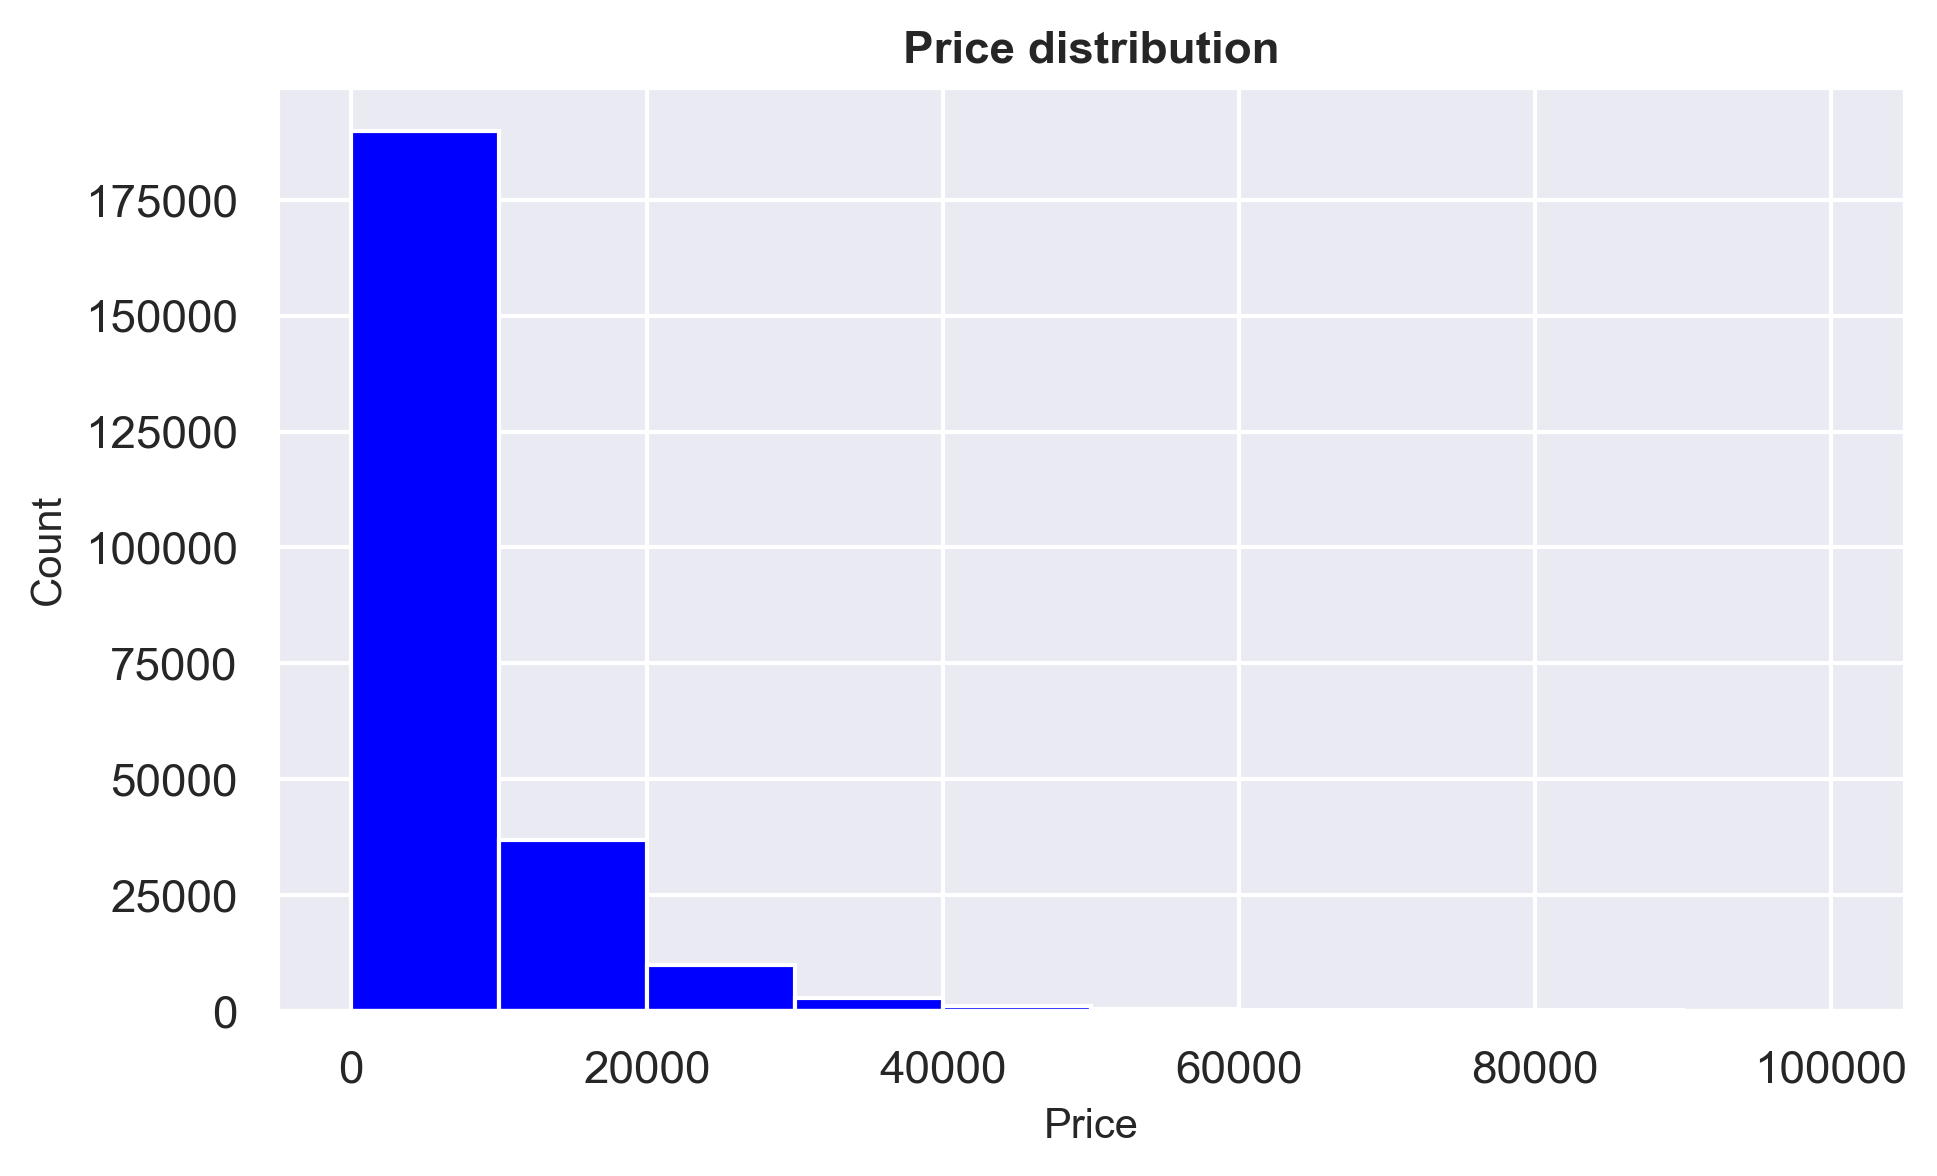

In [9]:
fig, ax = plt.subplots(figsize=(7, 4), dpi=300)

ax.hist(data.price, color='blue')

ax.set_title('Price distribution', size=11,  weight='extra bold')
ax.set_xlabel('Price', size=10)
ax.set_ylabel('Count', size=10)

plt.show()


**Таргет стоит логарифмировать**

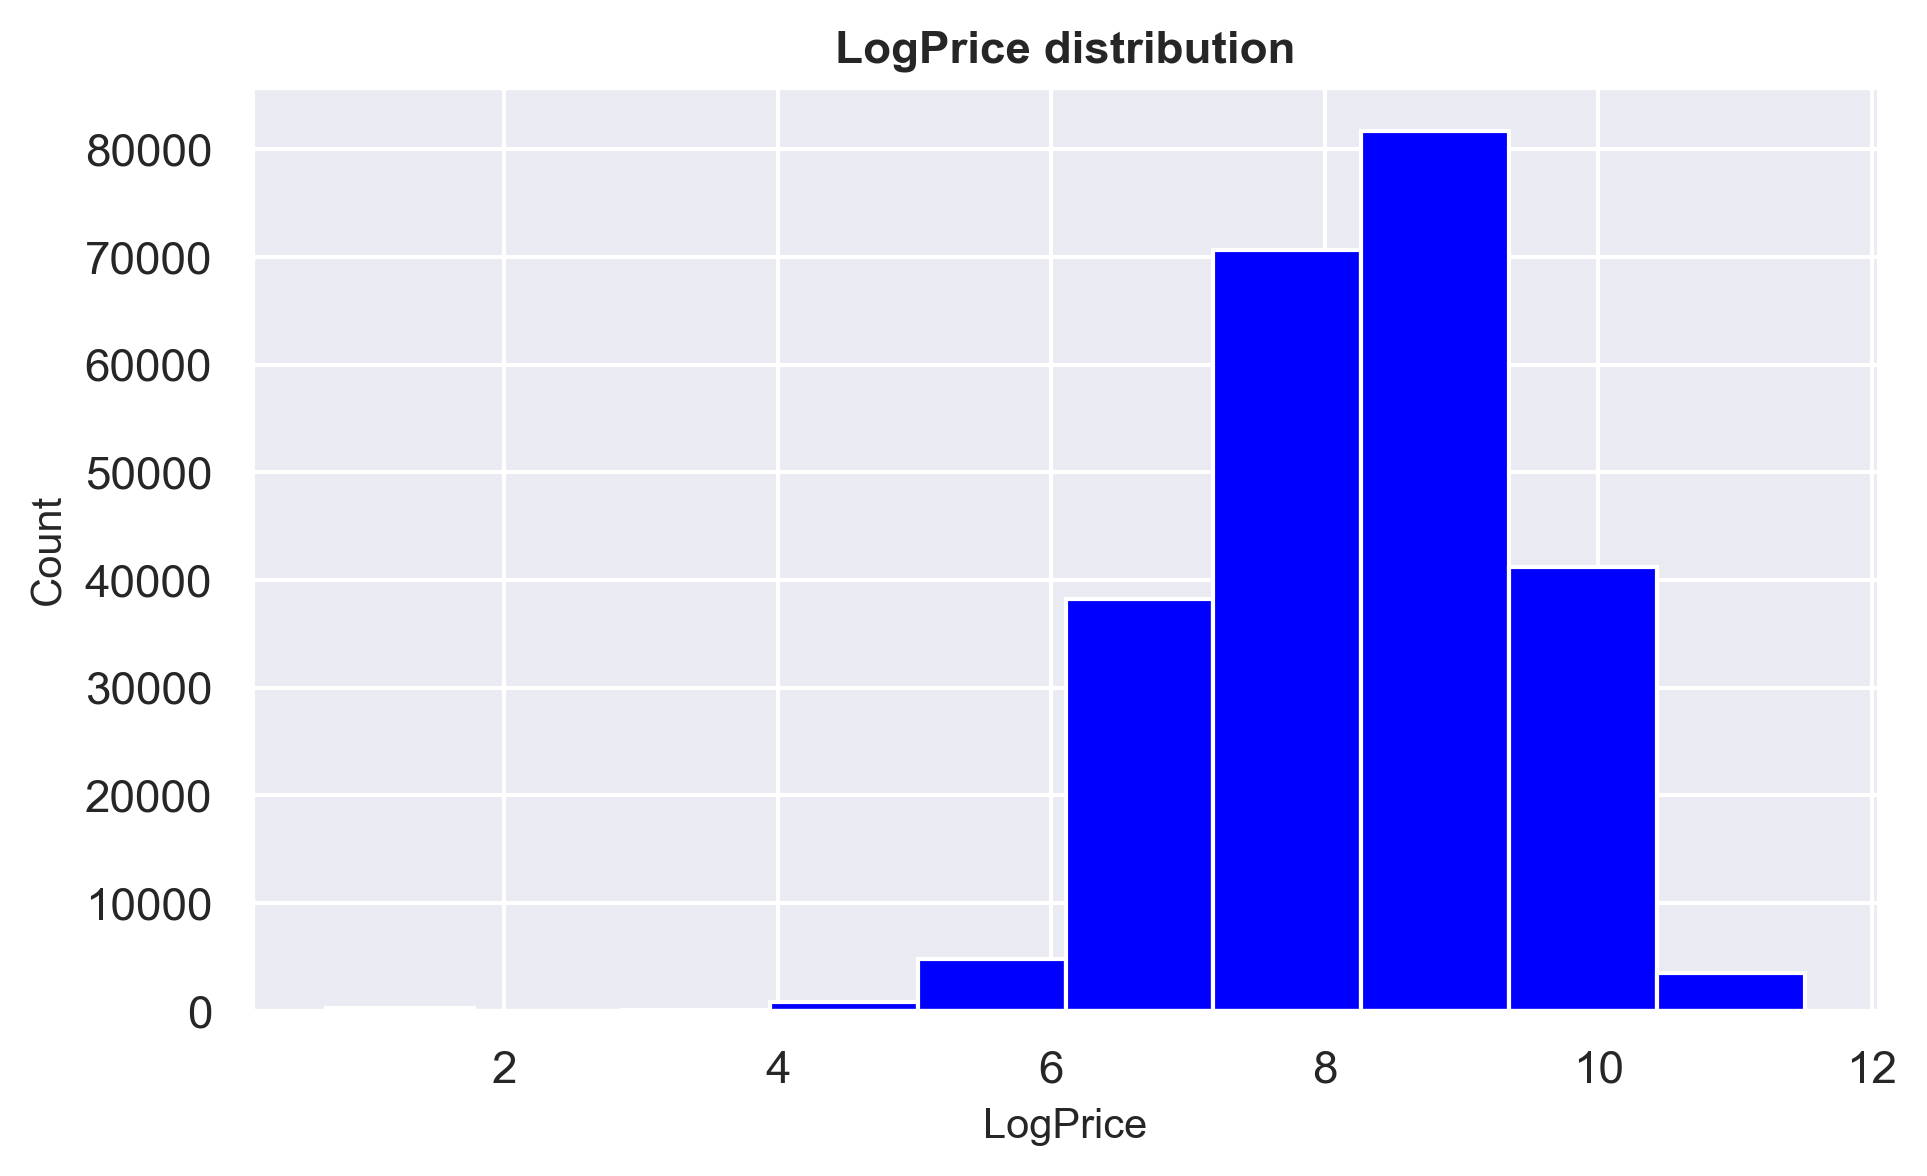

In [10]:
data['log_price'] = np.log1p(data.price)

fig, ax = plt.subplots(figsize=(7, 4), dpi=300)

ax.hist(data.log_price, color='blue')

ax.set_title('LogPrice distribution', size=11,  weight='extra bold')
ax.set_xlabel('LogPrice', size=10)
ax.set_ylabel('Count', size=10)

plt.show()


**В данных есть выбросы с очень низкой ценой, уберём их**

In [11]:
data = data[data['log_price'] > 3.7]


**Посмотрим на типы данных**

In [12]:
data.dtypes


brand                 object
model                 object
vehicleType           object
gearbox               object
fuelType              object
notRepairedDamage     object
powerPS                int64
kilometer              int64
autoAgeMonths          int64
price                  int64
log_price            float64
dtype: object

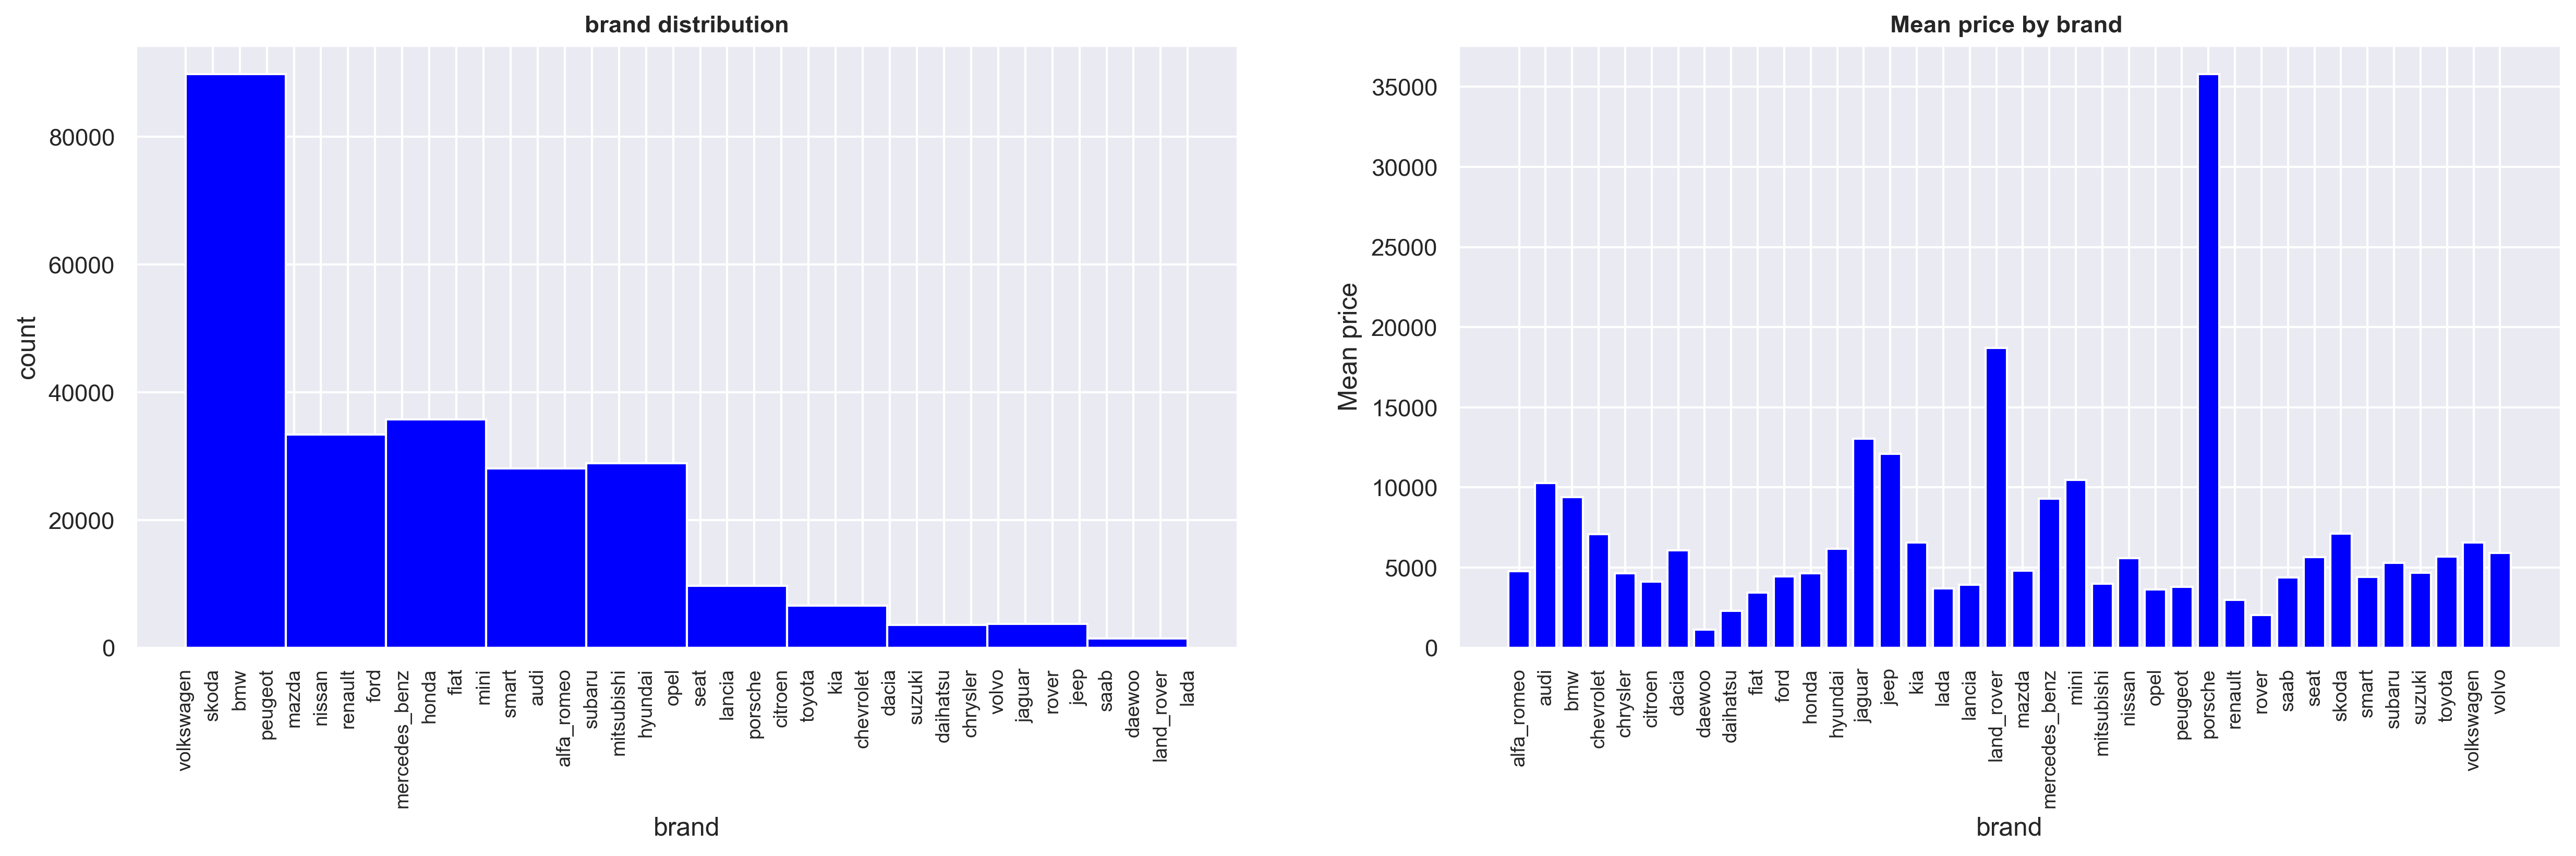

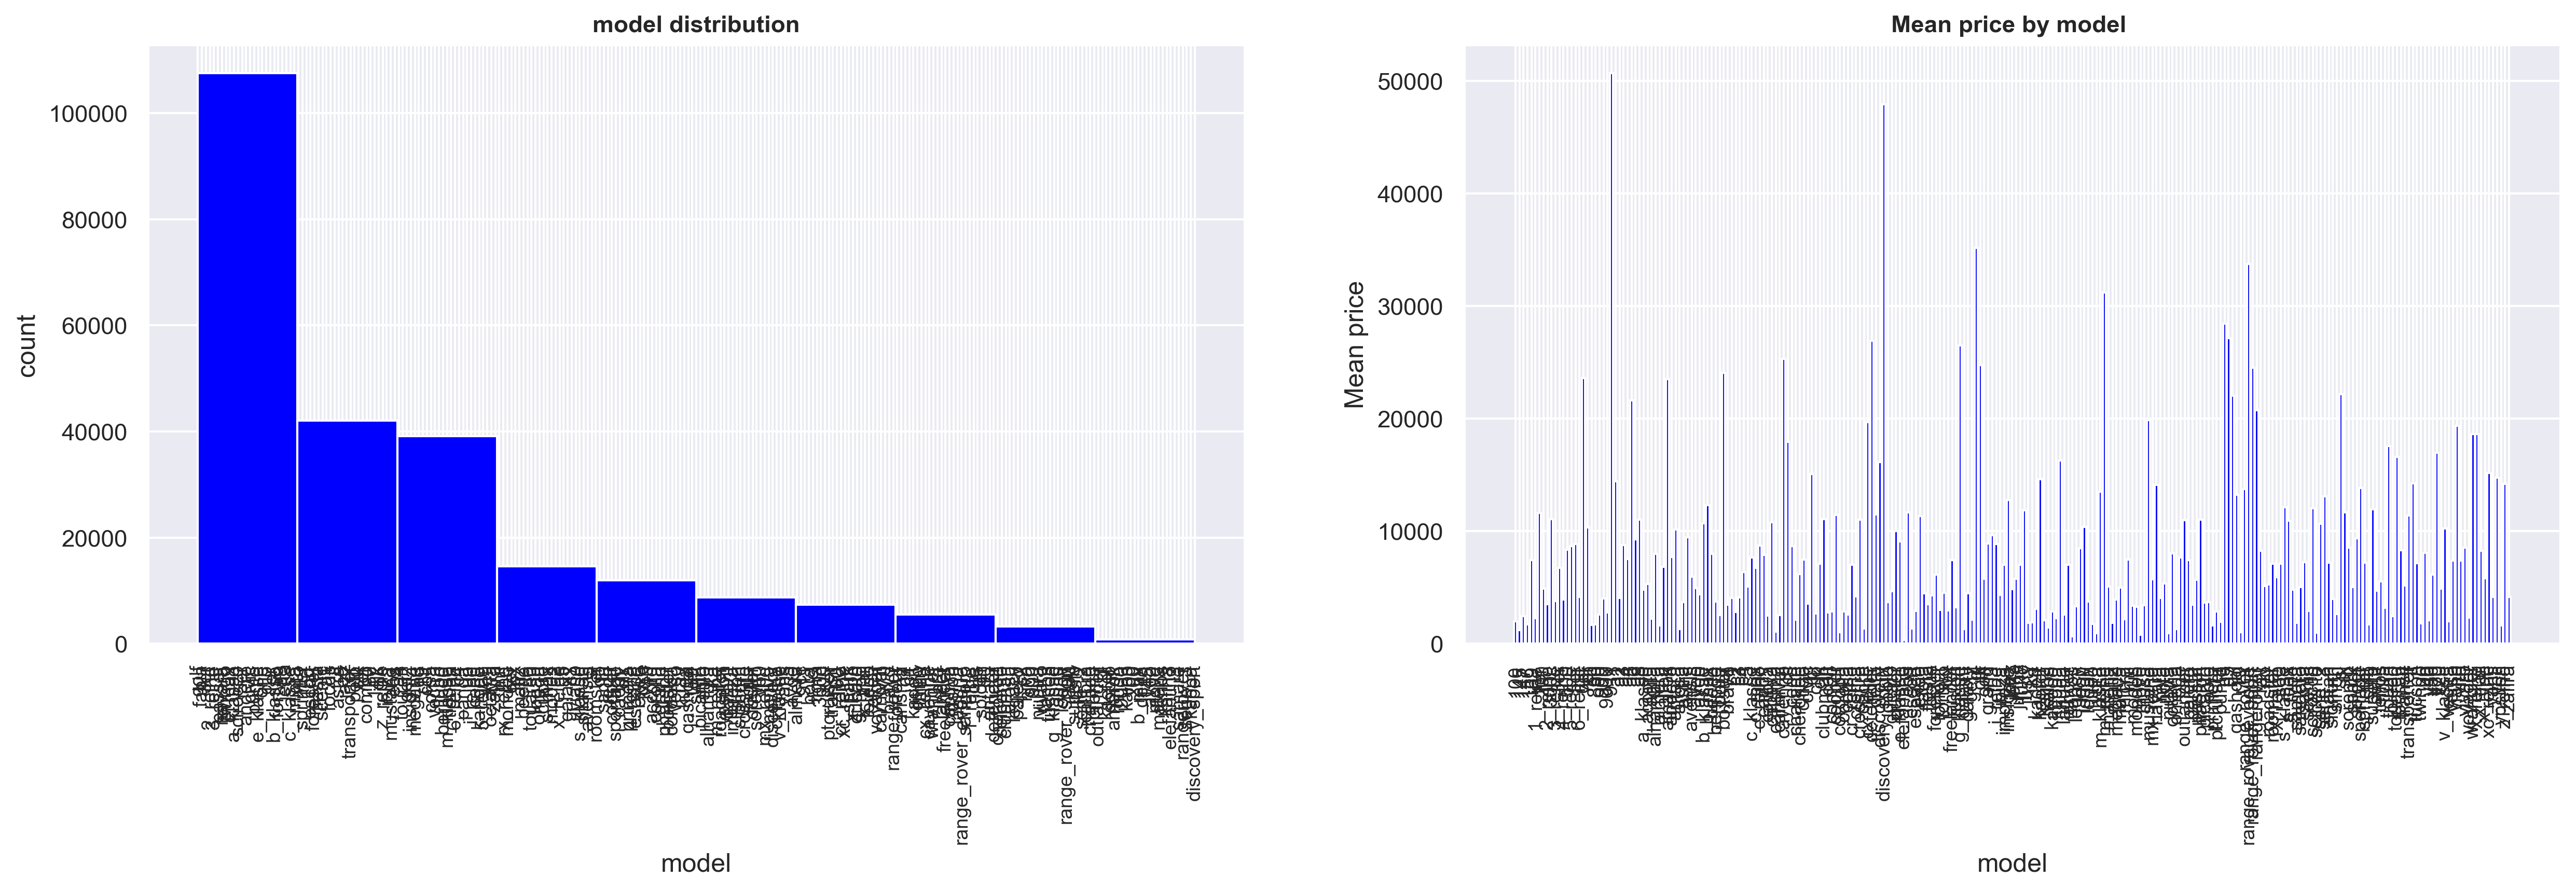

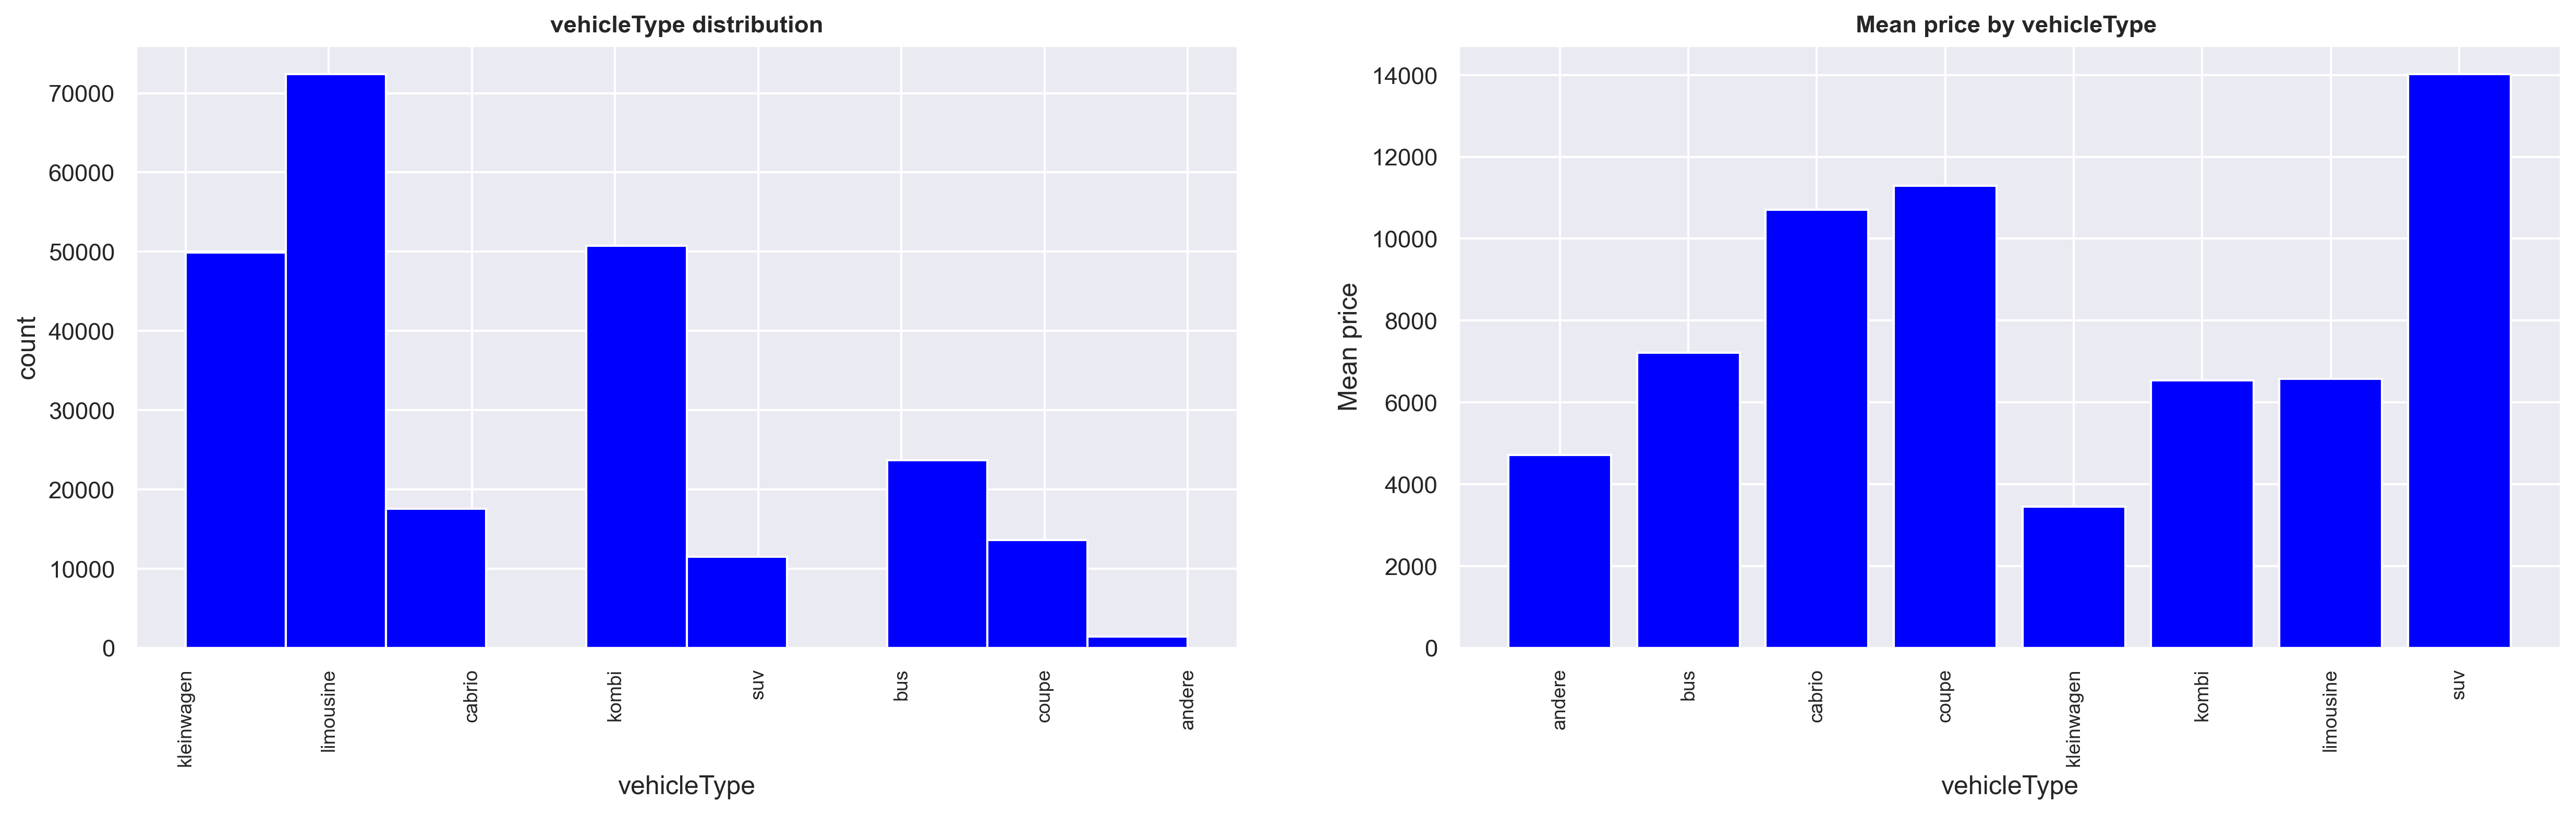

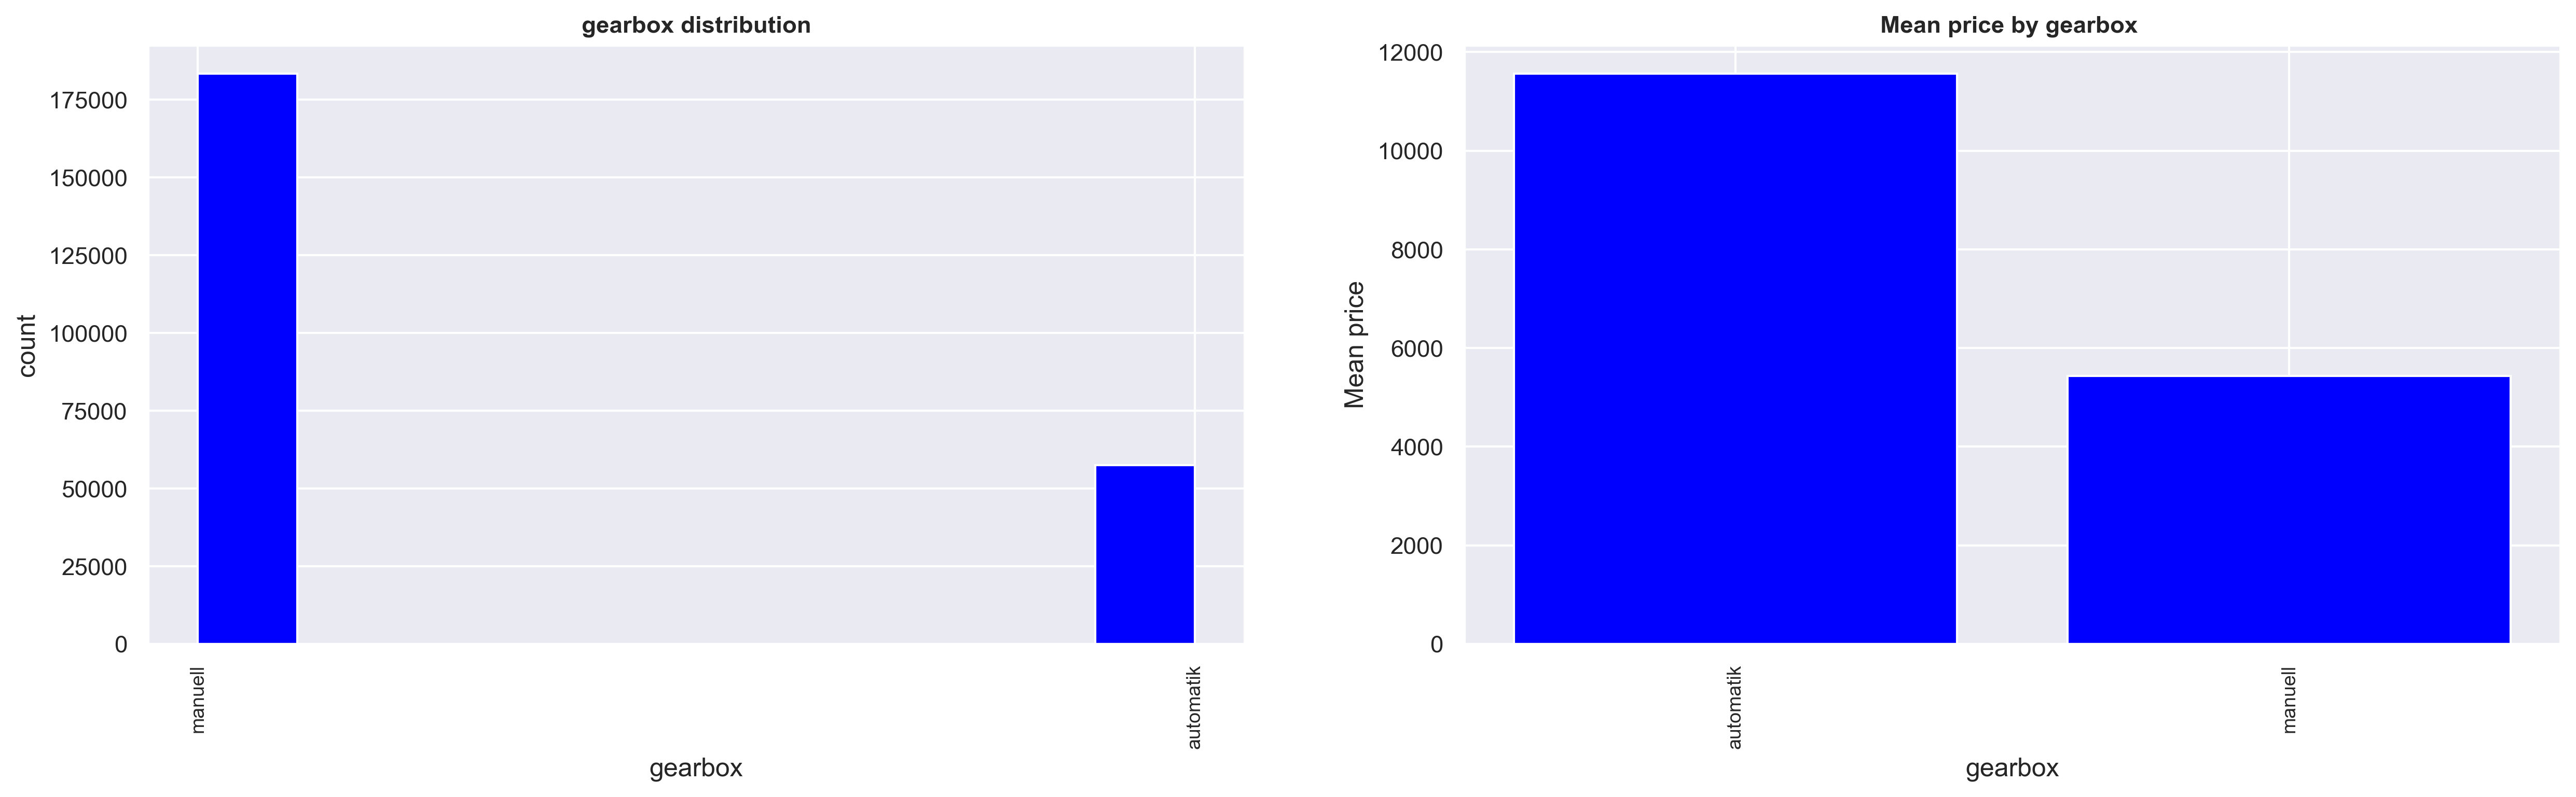

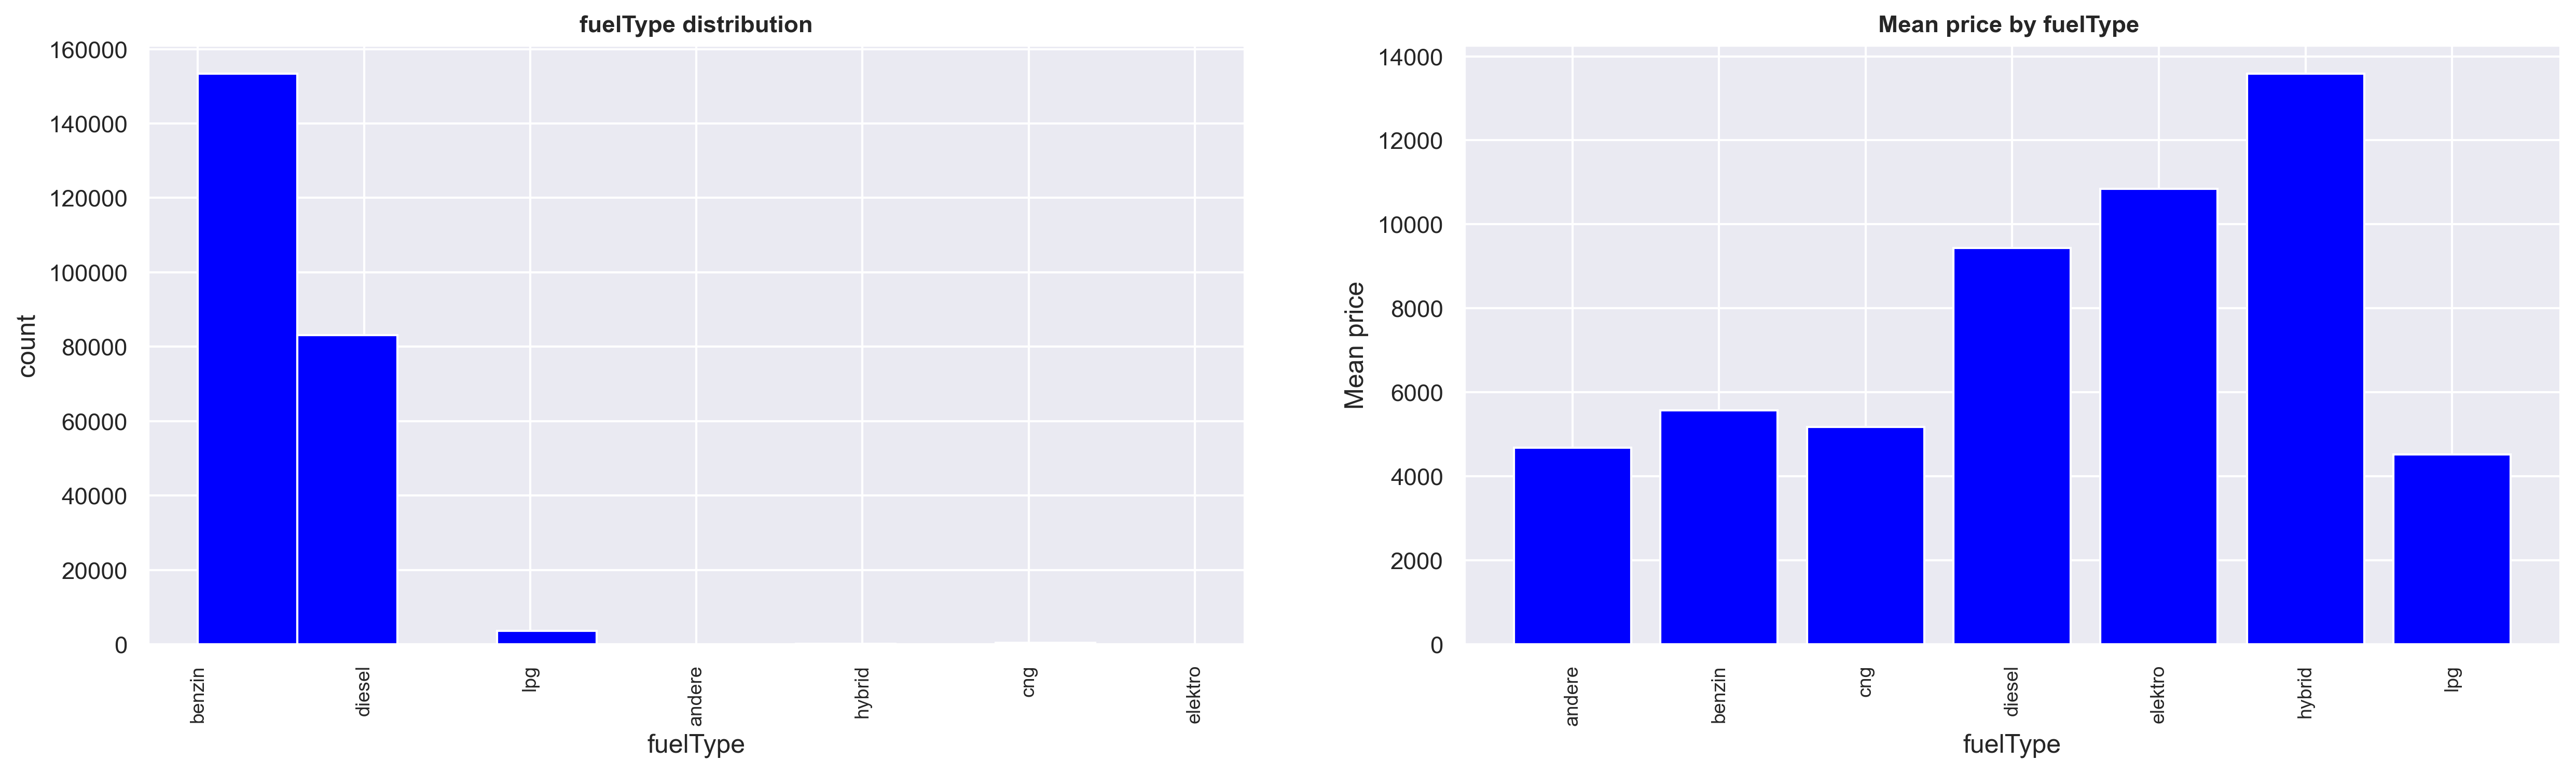

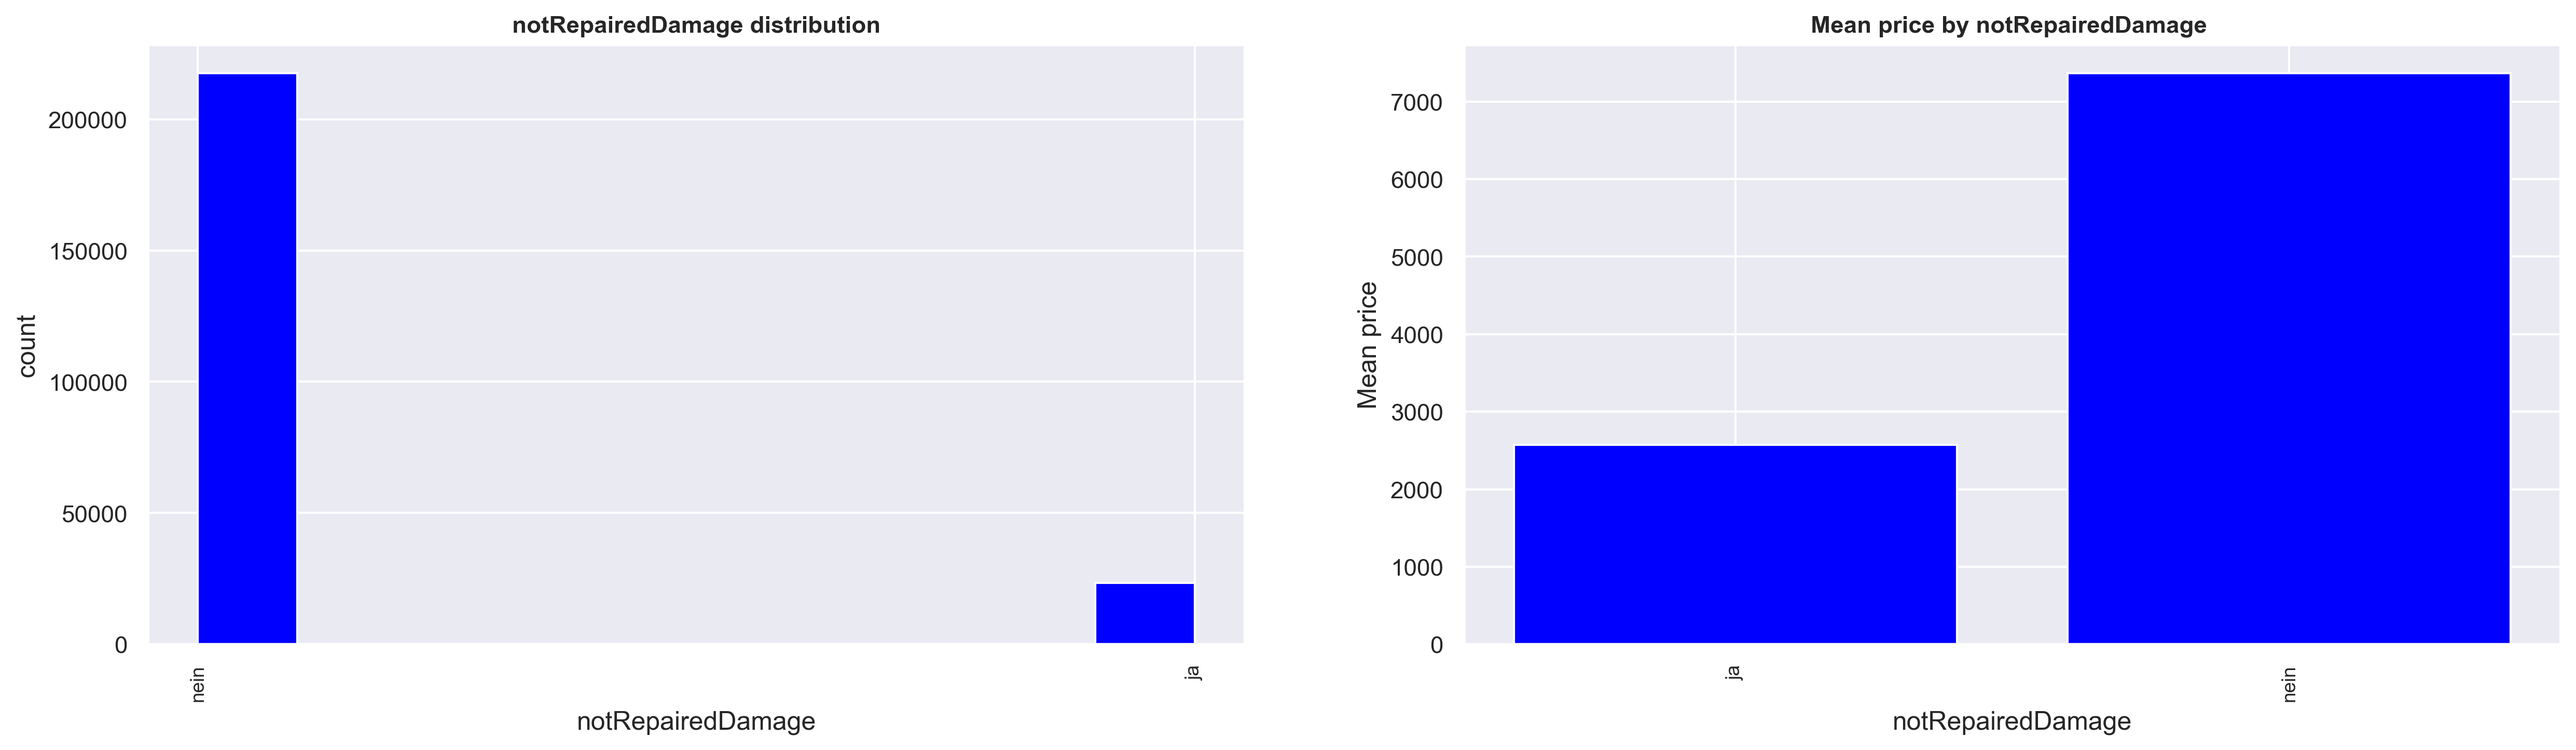

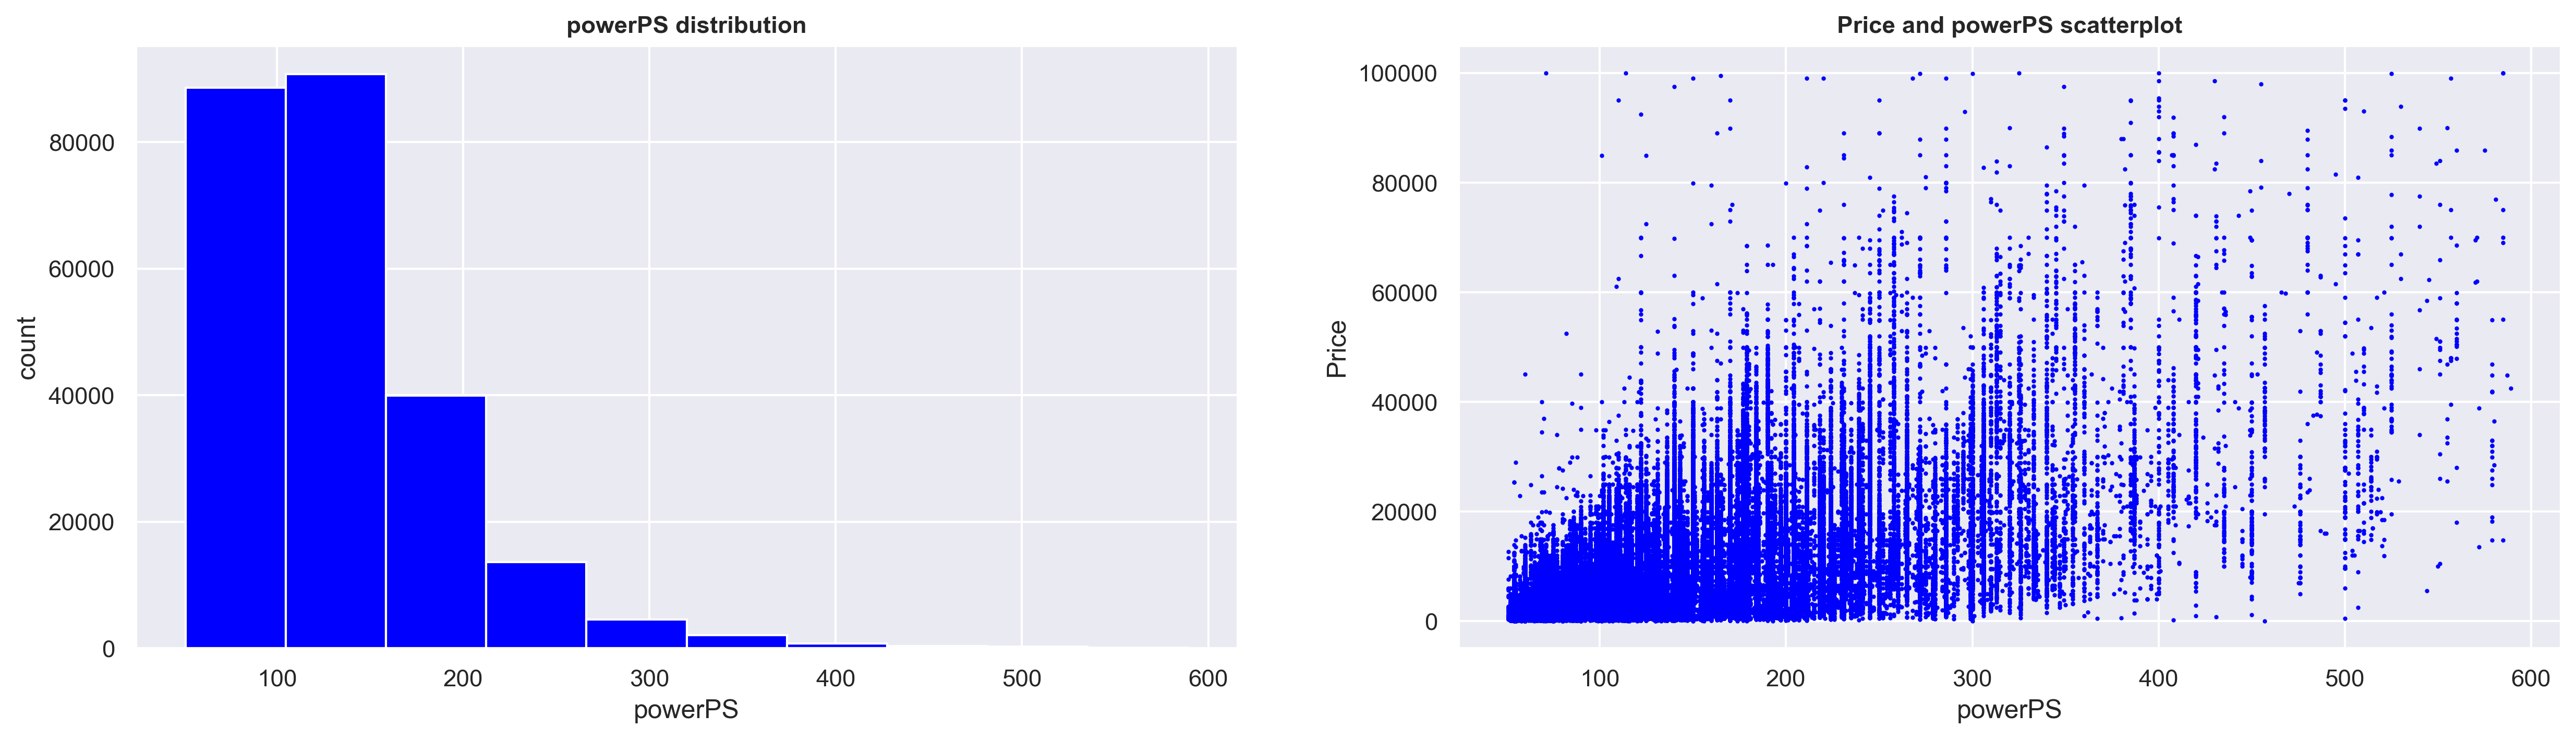

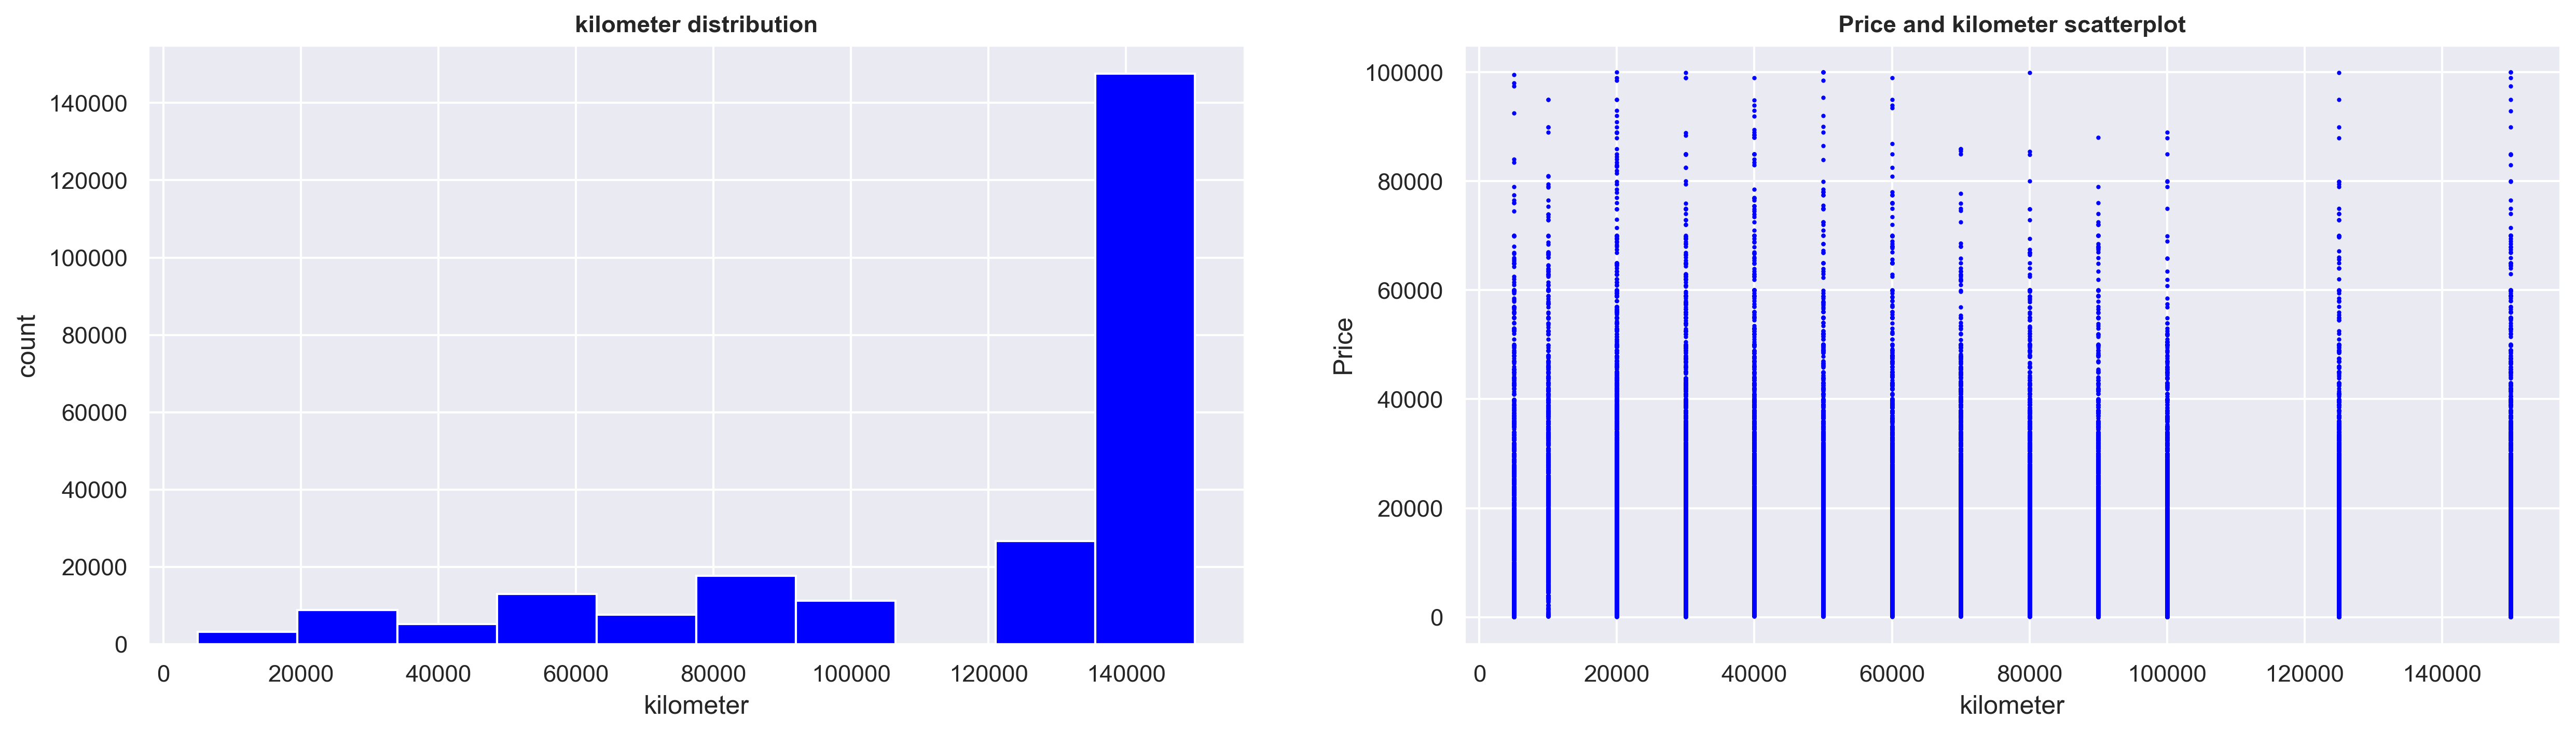

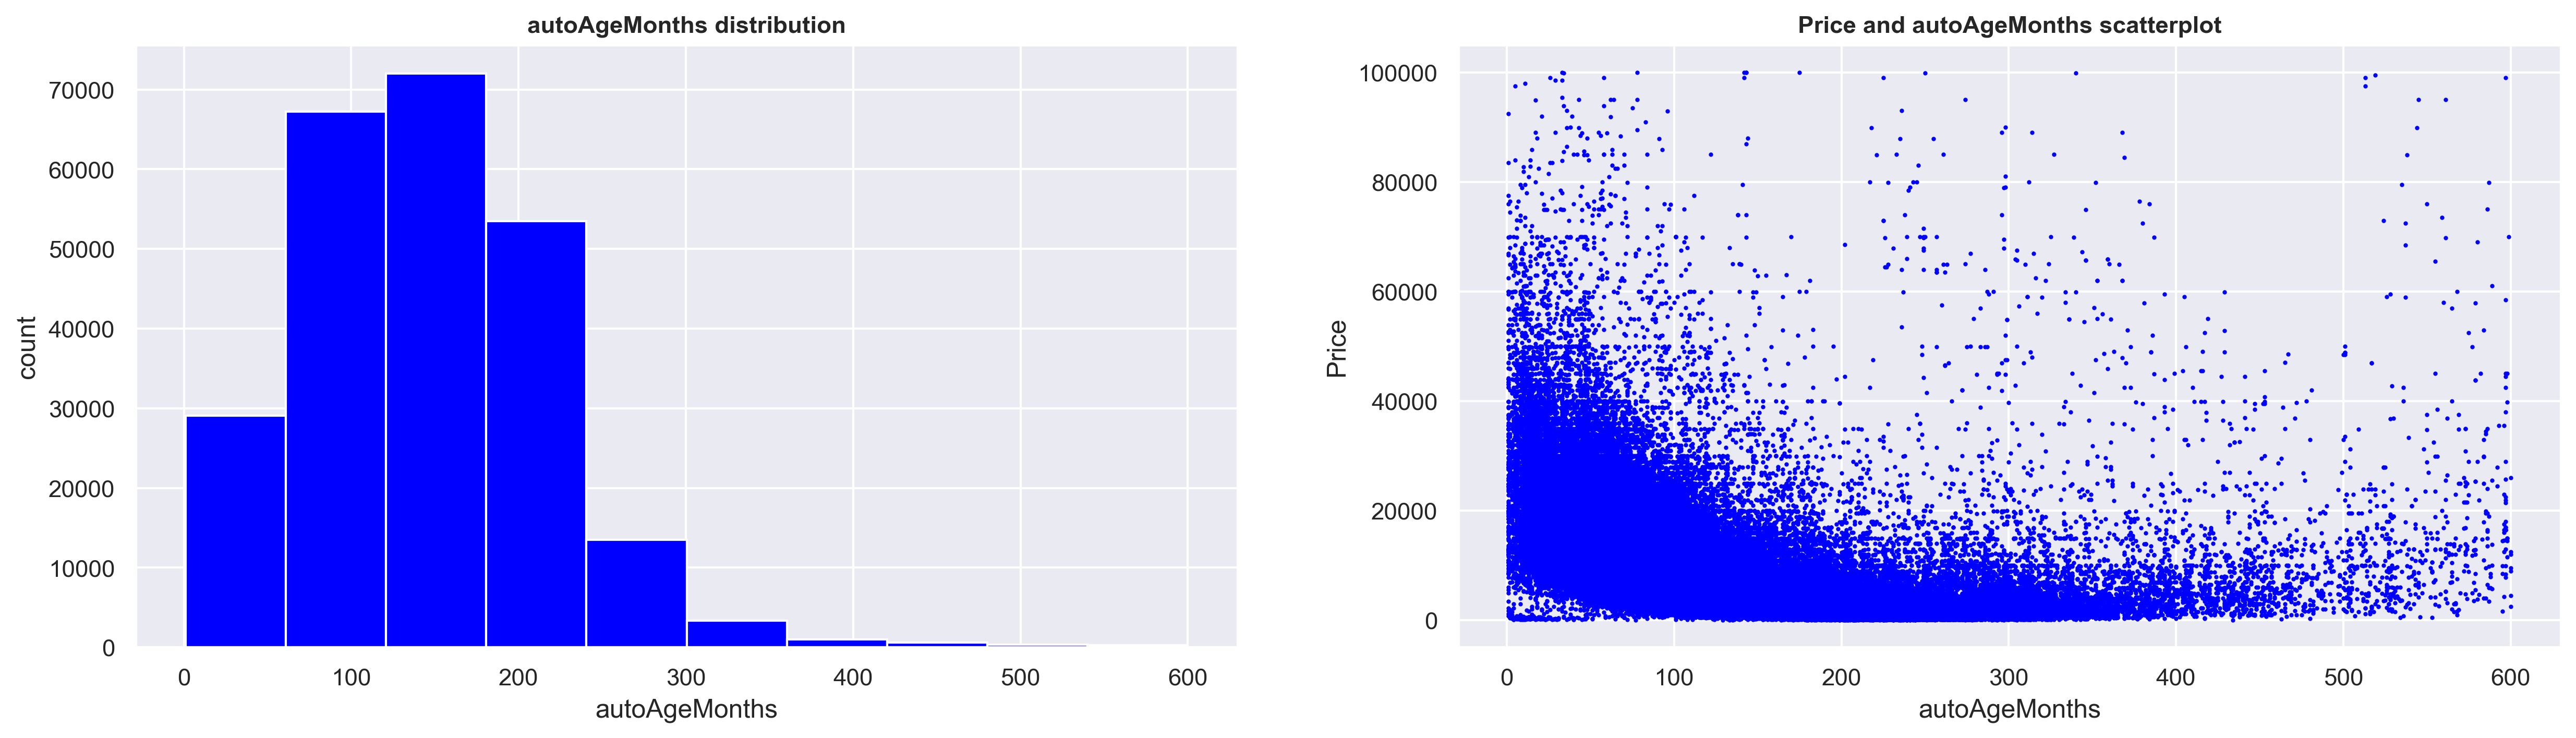

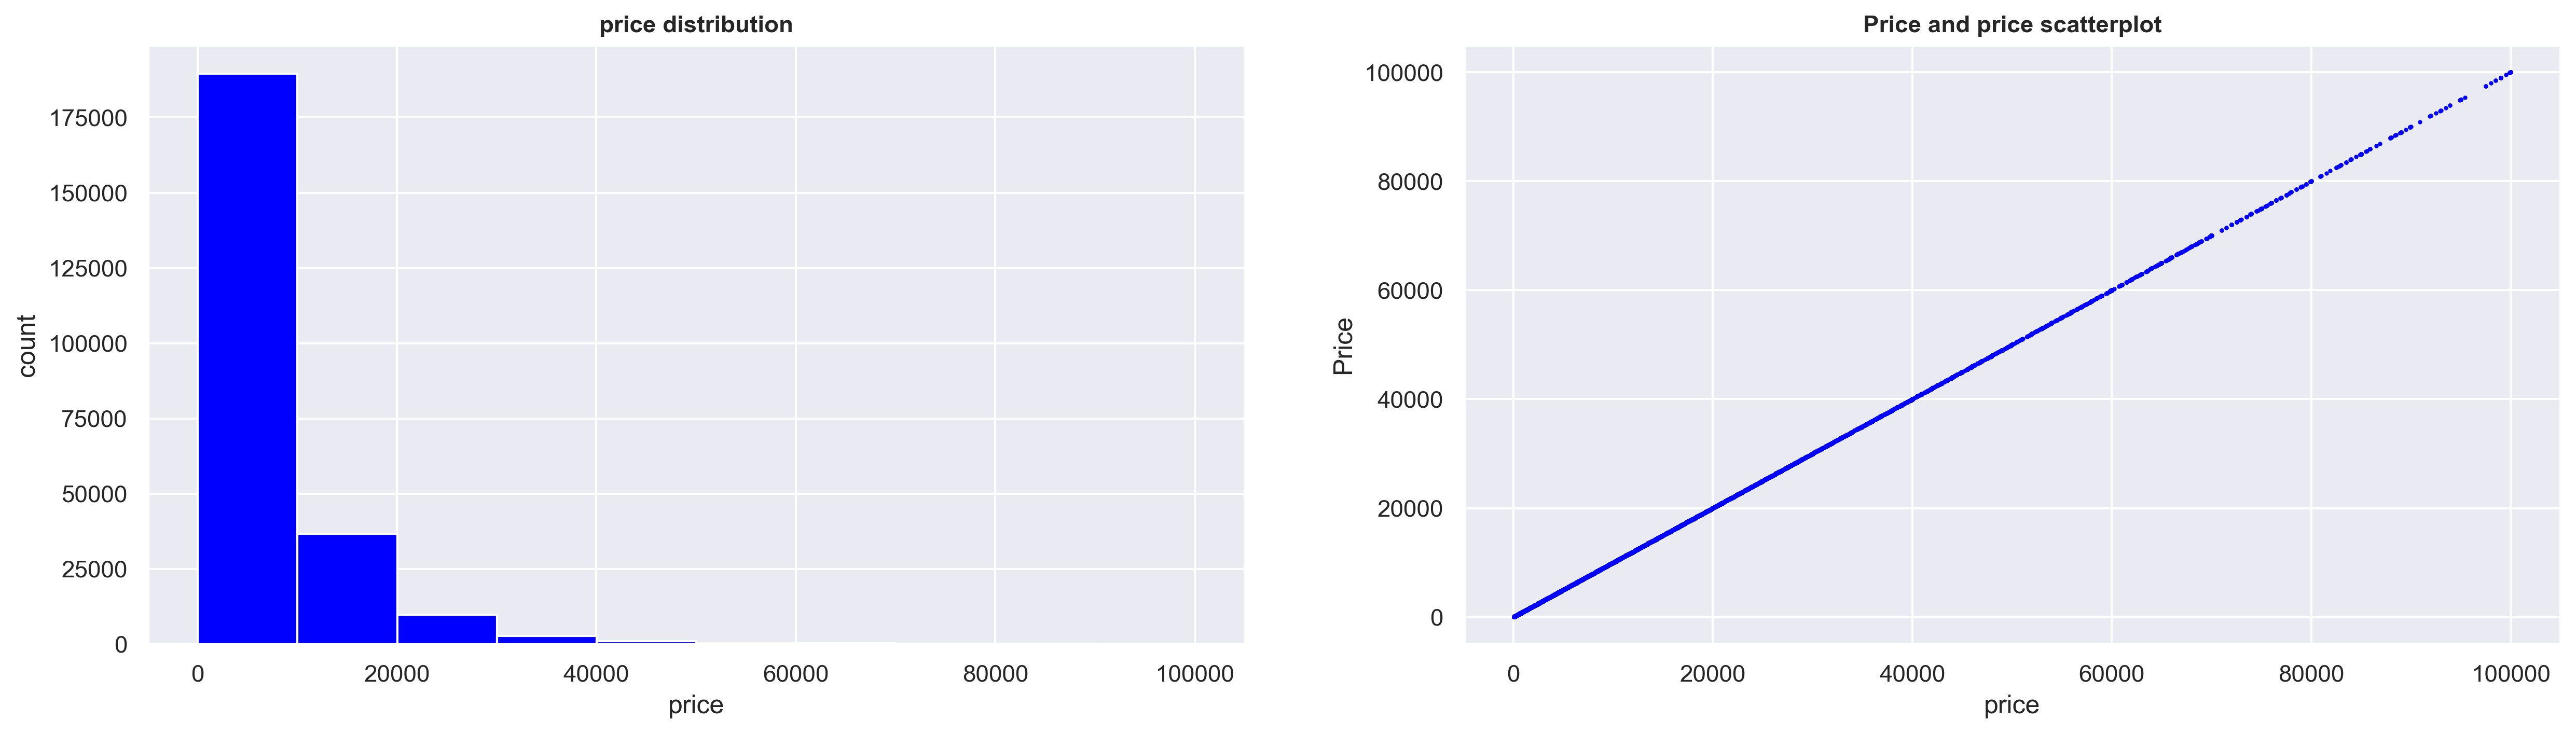

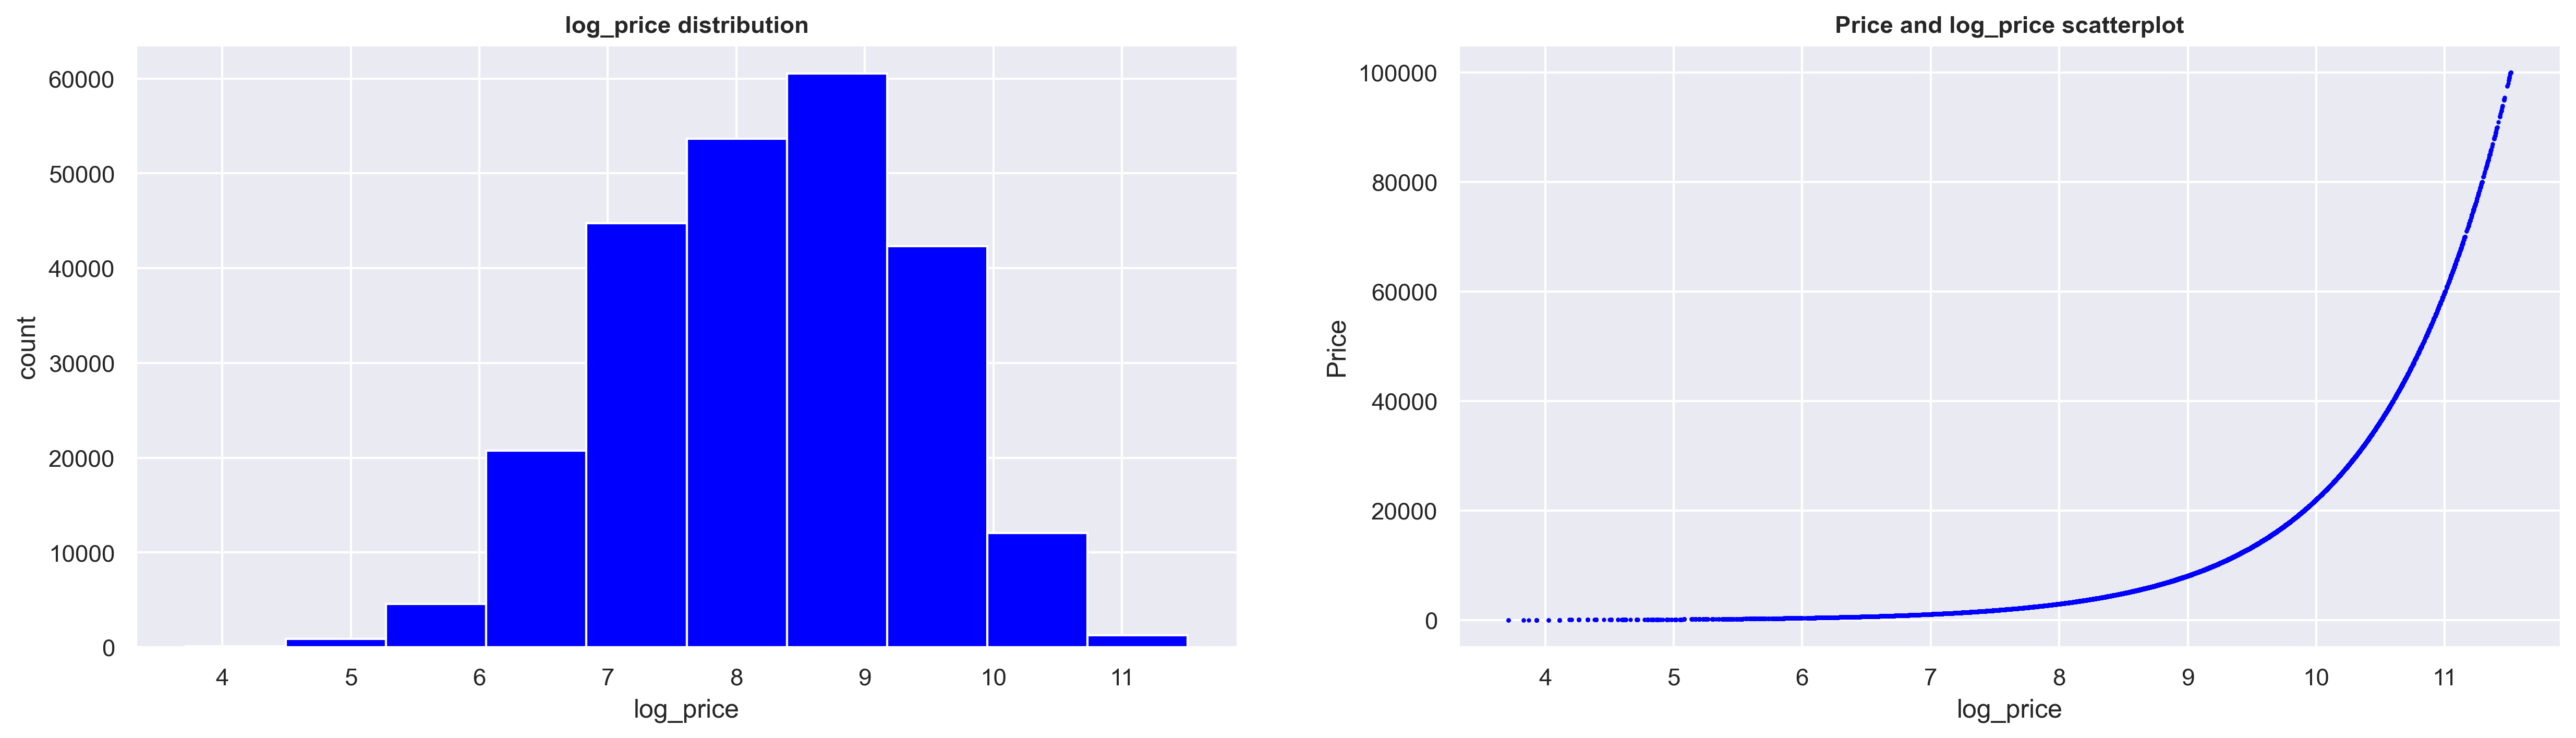

In [13]:
for col in data.columns:
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20, 5), dpi=300)
    
    ax[0].hist(data[col], color='blue')
    ax[0].set_title(f'{col} distribution', size=11, weight='extra bold')
    ax[0].set_xlabel(f'{col}')
    ax[0].set_ylabel(f'count')
    
    if data[col].dtype == object:
        ax[0].tick_params(axis='x', labelrotation=90, labelsize=9)
        
        pivot = data.pivot_table(values='price', columns=col)
        
        ax[1].bar(pivot.columns.values, pivot.values[0], color='blue')
        ax[1].set_title(f'Mean price by {col} ', size=11, weight='extra bold')
        ax[1].set_xlabel(f'{col}')
        ax[1].set_ylabel(f'Mean price')
        ax[1].tick_params(axis='x', labelrotation=90, labelsize=9)
    else:
        ax[1].scatter(data[col], data['price'], s=1, color='blue')
        ax[1].set_title(f'Price and {col} scatterplot', size=11, weight='extra bold')
        ax[1].set_xlabel(f'{col}')
        ax[1].set_ylabel(f'Price')
        
    plt.show()


**В общем и целом все признаки могут быть полезными, так как в зависимости от них значени ЦП меняется сильно, особенно важными являются категориальные признаки. Также можно заметить что график признака `kilometer` ведёт себя как категориальный**  
**В данных есть выбросы с очень высоким возрастом, уберём их**  

In [14]:
data = data[data.autoAgeMonths < 550]


**К категориальным признакам можно применить OHE (хотя признак `model` очень сильно раздует размерность признакого пространства), а к числовым стандартизацию (лучше даже прологарифмировать, чтобы приблизить к нормальному распределению)**

In [15]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage', 'kilometer']
numeric = ['powerPS', 'autoAgeMonths']
other = []


In [16]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price'].values


In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
], sparse_threshold=0)

x = column_transformer.fit_transform(x)


In [18]:
from sklearn.model_selection import train_test_split

x_train, x_valtest, y_train, y_valtest = train_test_split(x, y, test_size=0.2, random_state=0)

x_val, x_test, y_val, y_test = train_test_split(x_valtest, y_valtest, test_size=0.5, random_state=0)


## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [19]:
from tqdm import tqdm

In [20]:
from sklearn.metrics import r2_score

lambdas = np.logspace(-10, 0, 11, 10)
descents = ['full', 'stochastic', 'momentum', 'adam']
dimension = x_train.shape[1]
loss_history = {}

for descent in descents:
    best_score = 0
    best_lambda = lambdas[0]
    
    for lambda_ in tqdm(lambdas):
        descent_config = {
        'descent_name': descent,
        'kwargs': {
            'dimension': dimension,
             'lambda_': lambda_
            }
        }
            
        regression = LinearRegression(
            descent_config=descent_config
        )
        
        regression.fit(x_train, y_train)

        y_pred = regression.predict(x_val)
        
        score = r2_score(y_val, y_pred)

        if score > best_score:
            best_lambda = lambda_
            best_score = score
            
            train_score = r2_score(y_train, regression.predict(x_train))
            test_score = r2_score(y_test, regression.predict(x_test))
    
            loss_history[descent] = regression.loss_history
    
    print(f'{descent} - best_lambda {best_lambda}:')
    print(f'r2 train {train_score}, r2 test {test_score}')
    print(f'iters {len(regression.loss_history) - 1}')
    print()


100%|███████████████████████████████████████████| 11/11 [00:08<00:00,  1.32it/s]


full - best_lambda 1.0:
r2 train 0.7078857742199033, r2 test 0.7039061510354013
iters 70



100%|███████████████████████████████████████████| 11/11 [00:03<00:00,  3.14it/s]


stochastic - best_lambda 0.1:
r2 train 0.09673219323657889, r2 test 0.0889818906909623
iters 300



100%|███████████████████████████████████████████| 11/11 [00:16<00:00,  1.52s/it]


momentum - best_lambda 1.0:
r2 train 0.7809130896113818, r2 test 0.7751188282625743
iters 130



100%|███████████████████████████████████████████| 11/11 [00:36<00:00,  3.32s/it]

adam - best_lambda 1.0:
r2 train 0.781699070099052, r2 test 0.777150549771848
iters 240



### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

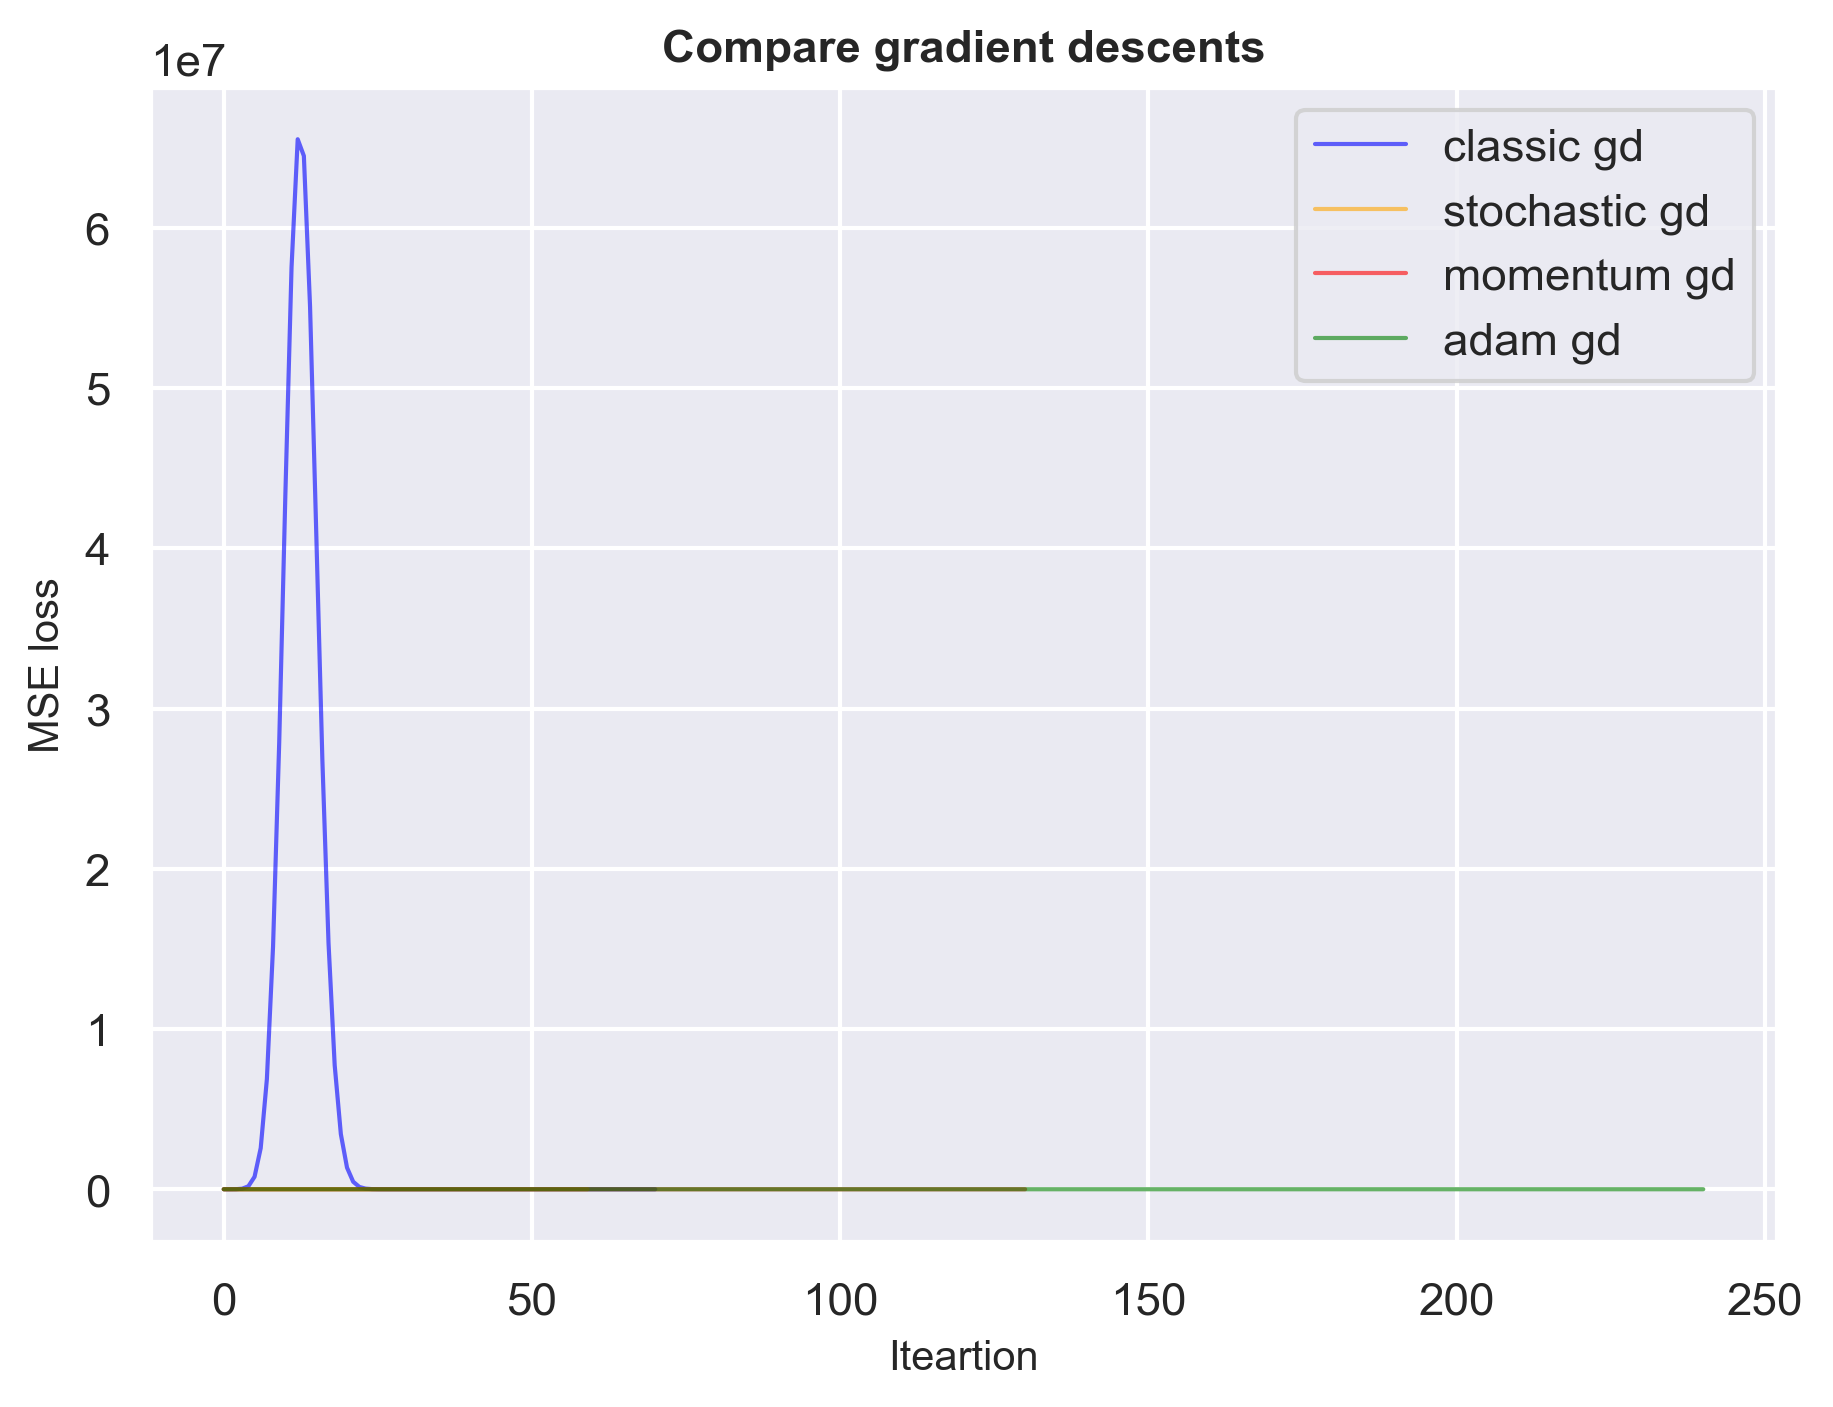

In [21]:
fig, ax = plt.subplots(figsize=(7, 5), dpi=300)

ax.plot(loss_history['full'], c='blue', lw=1, alpha=0.6, label='classic gd')
ax.plot(loss_history['stochastic'], c='orange', lw=1, alpha=0.6, label='stochastic gd')
ax.plot(loss_history['momentum'], c='red', lw=1, alpha=0.6, label='momentum gd')
ax.plot(loss_history['adam'], c='green', lw=1, alpha=0.6, label='adam gd')

ax.legend()

ax.set_title('Compare gradient descents', size=11, weight='extra bold')

ax.set_xlabel('Iteartion', size=10)
ax.set_ylabel('MSE loss', size=10)

plt.show()

**Невооруженным взглядом видно что классический и стохастический градиентные спуски менее стабильны. Кроме того стохастическому градиентному спуску требуется больше всего итераций чтобы сойтись, а классическому меньше всего. Моментум и адам более стабильны и конкретно в нашей задаче моментум сошёлся быстрее адама**

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [22]:
import time

In [23]:
batch_sizes = np.arange(5, 500, 10)
k = 10
dimension = x_train.shape[1]
mean_secs = []
mean_iters = []

for batch_size in batch_sizes:
    secs = []
    iters = []

    for i in tqdm(range(k)):
        descent_config = {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension': dimension,
            'batch_size': batch_size,
            'lambda_': 1e-1
            }
        }
        
        regression = LinearRegression(
            descent_config=descent_config
        )
        start = time.time()
        regression.fit(x_train, y_train)
        end = time.time()
        
        secs.append(end - start)
        iters.append(len(regression.loss_history) - 1)
    
    mean_secs.append(np.mean(secs))
    mean_iters.append(int(np.mean(iters)))

100%|███████████████████████████████████████████| 10/10 [00:02<00:00,  3.47it/s]


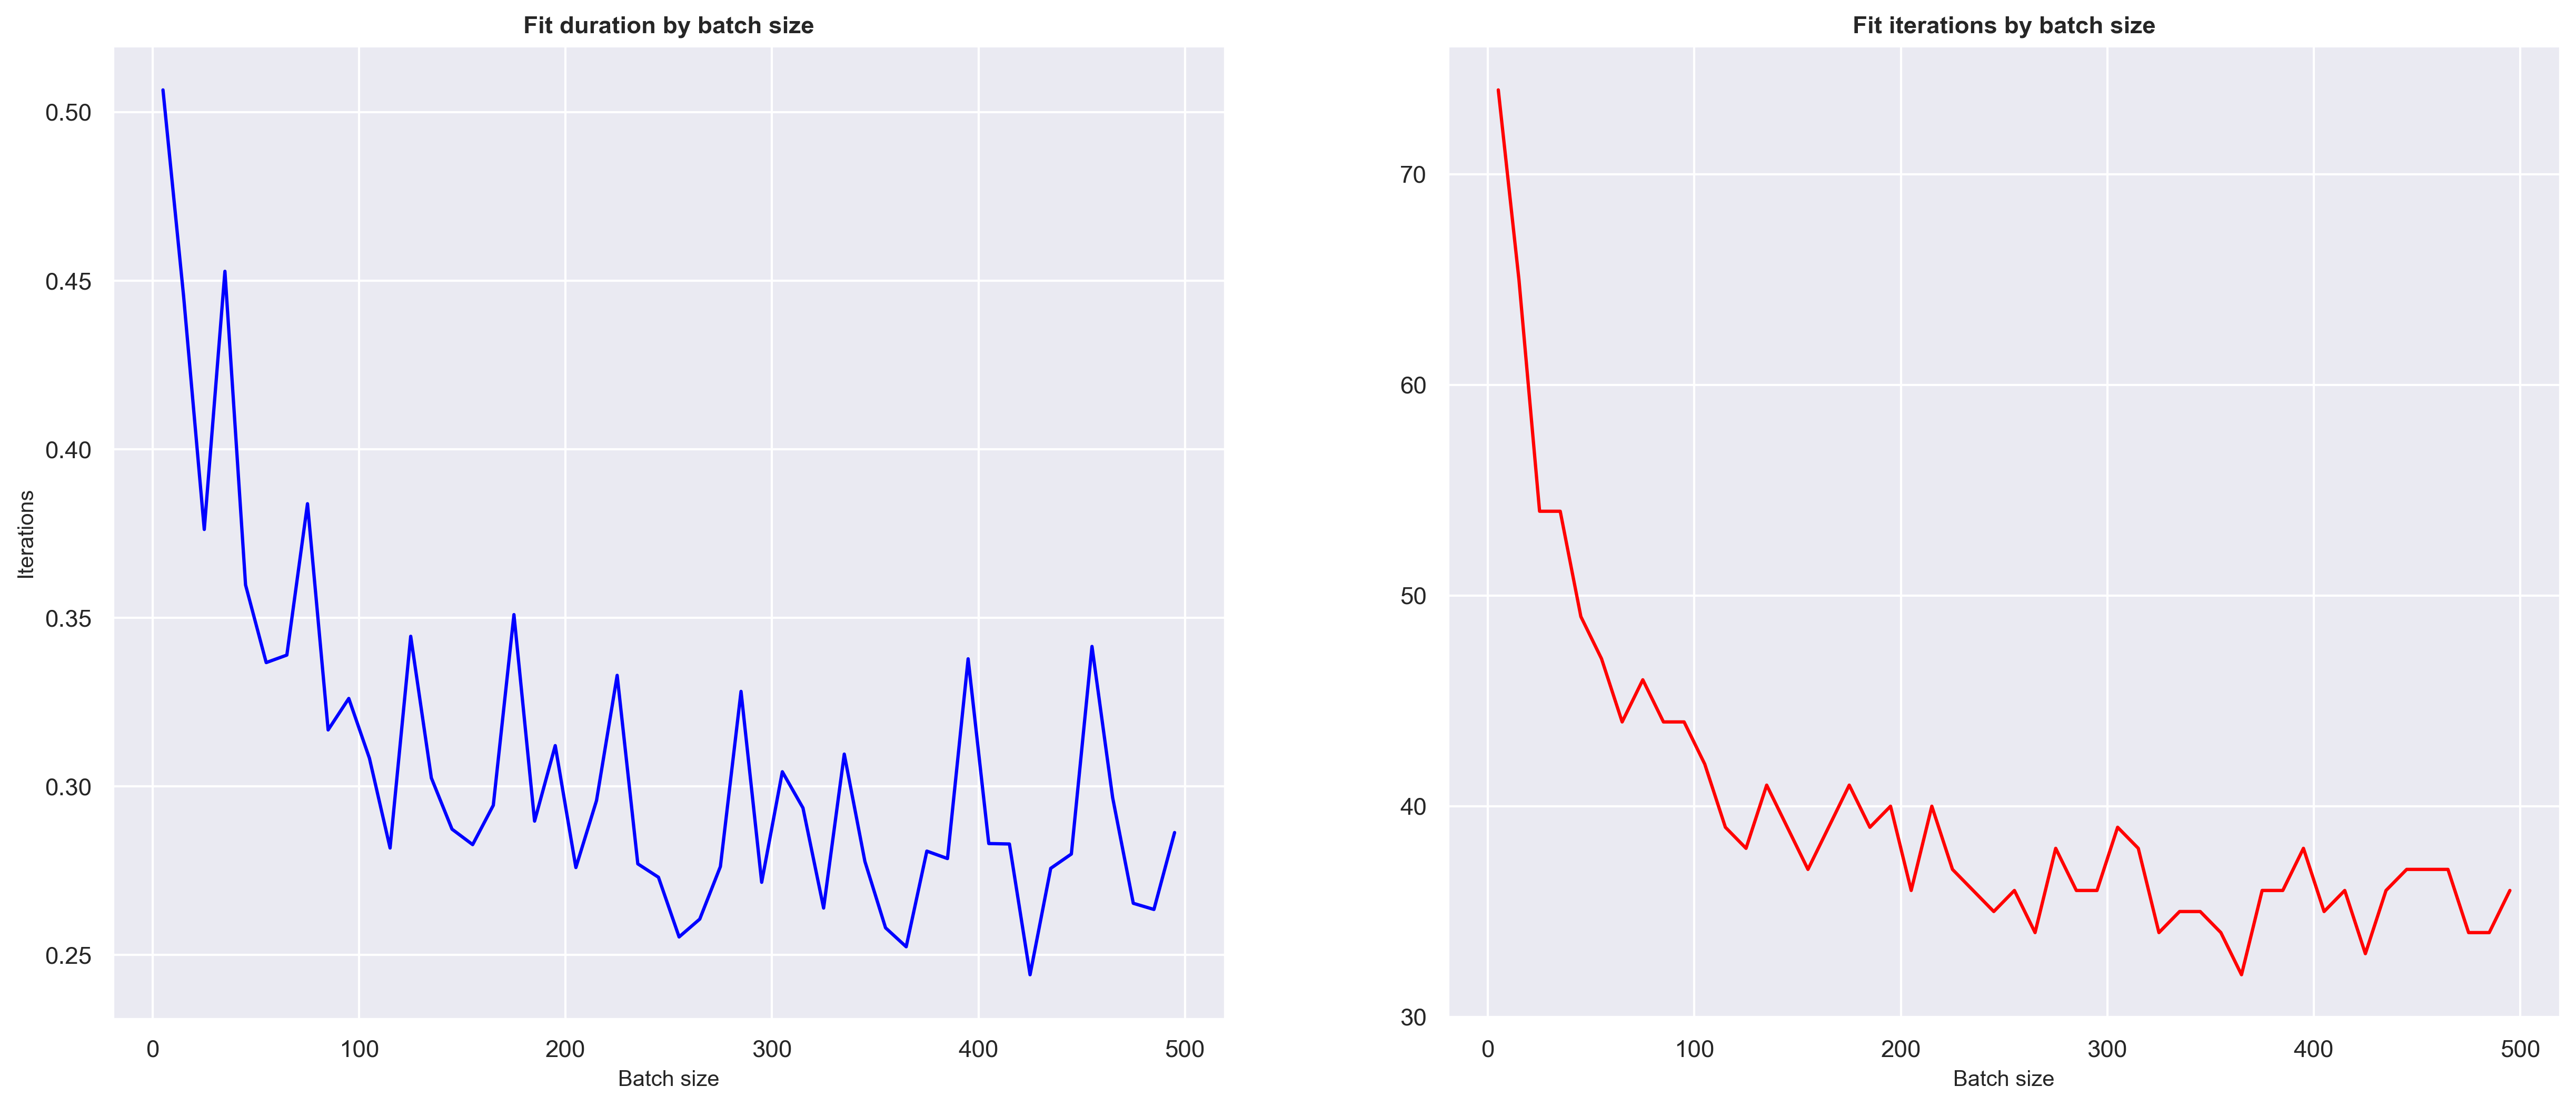

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), dpi=300)

ax[0].plot(batch_sizes, mean_secs, c='blue')
ax[1].plot(batch_sizes, mean_iters, c='red')

ax[0].set_title('Fit duration by batch size', size=11, weight='extra bold')
ax[1].set_title('Fit iterations by batch size', size=11, weight='extra bold')

ax[0].set_xlabel('Batch size', size=10)
ax[1].set_xlabel('Batch size', size=10)

ax[0].set_ylabel('Seconds', size=10)
ax[0].set_ylabel('Iterations', size=10)

plt.show()

**Получается что увеличение батча в рамках разумных границ снижает длительность обучения. Поэтому не стоит брать слишком маленький размер батча**

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/54610/run-report/95634812  

Ник aashabunya@edu.hse.ru

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [25]:
lambdas = np.logspace(-3, 0, 4, 10)
mus = np.logspace(-3, 1, 5, 10)
descents = ['full', 'stochastic', 'momentum', 'adam']
dimension = x_train.shape[1]
loss_history_reg = {}

for descent in descents:
    best_score = 0
    best_lambda = lambdas[0]
    
    for lambda_ in lambdas:
        best_mu = mus[0]
        
        for mu in tqdm(mus):
            descent_config = {
            'descent_name': descent,
            'regularized': True,
            'kwargs': {
                'dimension': dimension,
                'lambda_': lambda_,
                'mu': mu
                }
            }
            
            regression = LinearRegression(
                descent_config=descent_config
            )
        
            regression.fit(x_train, y_train)

            y_pred = regression.predict(x_val)
        
            score = r2_score(y_val, y_pred)

            if score > best_score:
                best_lambda = lambda_
                best_mu = mu
                best_score = score
            
                train_score = r2_score(y_train, regression.predict(x_train))
                test_score = r2_score(y_test, regression.predict(x_test))
    
                loss_history_reg[descent] = regression.loss_history
    
    print(f'{descent} - best lambda {best_lambda} - best mu {best_mu}:')
    print(f'r2 train {train_score}, r2 test {test_score}')
    print(f'iters {len(regression.loss_history) - 1}')
    print()


100%|█████████████████████████████████████████████| 5/5 [01:08<00:00, 13.67s/it]


full - best lambda 1.0 - best mu 0.001:
r2 train 0.6261993071328615, r2 test 0.6269272639555616
iters 300



100%|█████████████████████████████████████████████| 5/5 [00:10<00:00,  2.10s/it]


stochastic - best lambda 1.0 - best mu 0.01:
r2 train 0.13329760966052284, r2 test 0.14022667222682583
iters 300



100%|█████████████████████████████████████████████| 5/5 [01:12<00:00, 14.44s/it]


momentum - best lambda 1.0 - best mu 0.001:
r2 train 0.7635145649263119, r2 test 0.7621551759390586
iters 300



100%|█████████████████████████████████████████████| 5/5 [01:13<00:00, 14.62s/it]

adam - best lambda 1.0 - best mu 0.001:
r2 train 0.751975662625872, r2 test 0.748478874529537
iters 300



**Резултаты по метрикам стали хуже,  а так же увеличилось число итераций, однако стохастический градиентный спуск всё же стал давать результаты лучше чем без ругляризации**

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

$$
L(y_i, \langle w, x_i \rangle) = \log\left(\cosh(\langle w, x_i \rangle - y_i)\right)
$$

$$ \nabla_w L = x_i  \tanh(\langle w, x_i \rangle - y_i)$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [31]:
from descents import LossFunction

lambdas = np.logspace(-10, 0, 11, 10)
descents = ['full', 'stochastic', 'momentum', 'adam']
dimension = x_train.shape[1]
loss_history = {}

for descent in descents:
    best_score = 0
    best_lambda = lambdas[0]
    
    for lambda_ in tqdm(lambdas):
        descent_config = {
        'descent_name': descent,
        'kwargs': {
            'dimension': dimension,
            'lambda_': lambda_,
            'loss_function': LossFunction.LogCosh
            }
        }
            
        regression = LinearRegression(
            descent_config=descent_config
        )
        
        regression.fit(x_train, y_train)

        y_pred = regression.predict(x_val)
        
        score = r2_score(y_val, y_pred)

        if score > best_score:
            best_lambda = lambda_
            best_score = score
            
            train_score = r2_score(y_train, regression.predict(x_train))
            test_score = r2_score(y_test, regression.predict(x_test))
    
            loss_history[descent] = regression.loss_history
    
    print(f'{descent} - best_lambda {best_lambda}:')
    print(f'r2 train {train_score}, r2 test {test_score}')
    print(f'iters {len(regression.loss_history) - 1}')
    print()


100%|███████████████████████████████████████████| 11/11 [00:08<00:00,  1.30it/s]


full - best_lambda 1.0:
r2 train 0.4370516337589304, r2 test 0.42516977942842704
iters 81



100%|███████████████████████████████████████████| 11/11 [00:03<00:00,  3.62it/s]


stochastic - best_lambda 1.0:
r2 train 0.6129953223770188, r2 test 0.6045576223518567
iters 211



100%|███████████████████████████████████████████| 11/11 [00:16<00:00,  1.46s/it]


momentum - best_lambda 1.0:
r2 train 0.7542982387667011, r2 test 0.7463145251548977
iters 114



100%|███████████████████████████████████████████| 11/11 [00:42<00:00,  3.83s/it]

adam - best_lambda 1.0:
r2 train 0.7816420166229712, r2 test 0.7755254029933344
iters 186



**Адам всё также выдает хорошее качество, но сходится быстрее. Моментум работает чуть хуже, чем с МСЕ, но и сходится быстрее. Стохастический градиентный спуск стал работать значительно лучше, кроме того и сходится быстрее. Значительно хуже по метрикам показывает себя классический градиентный спуск, кроме того он еще и чуть дольше сходится**

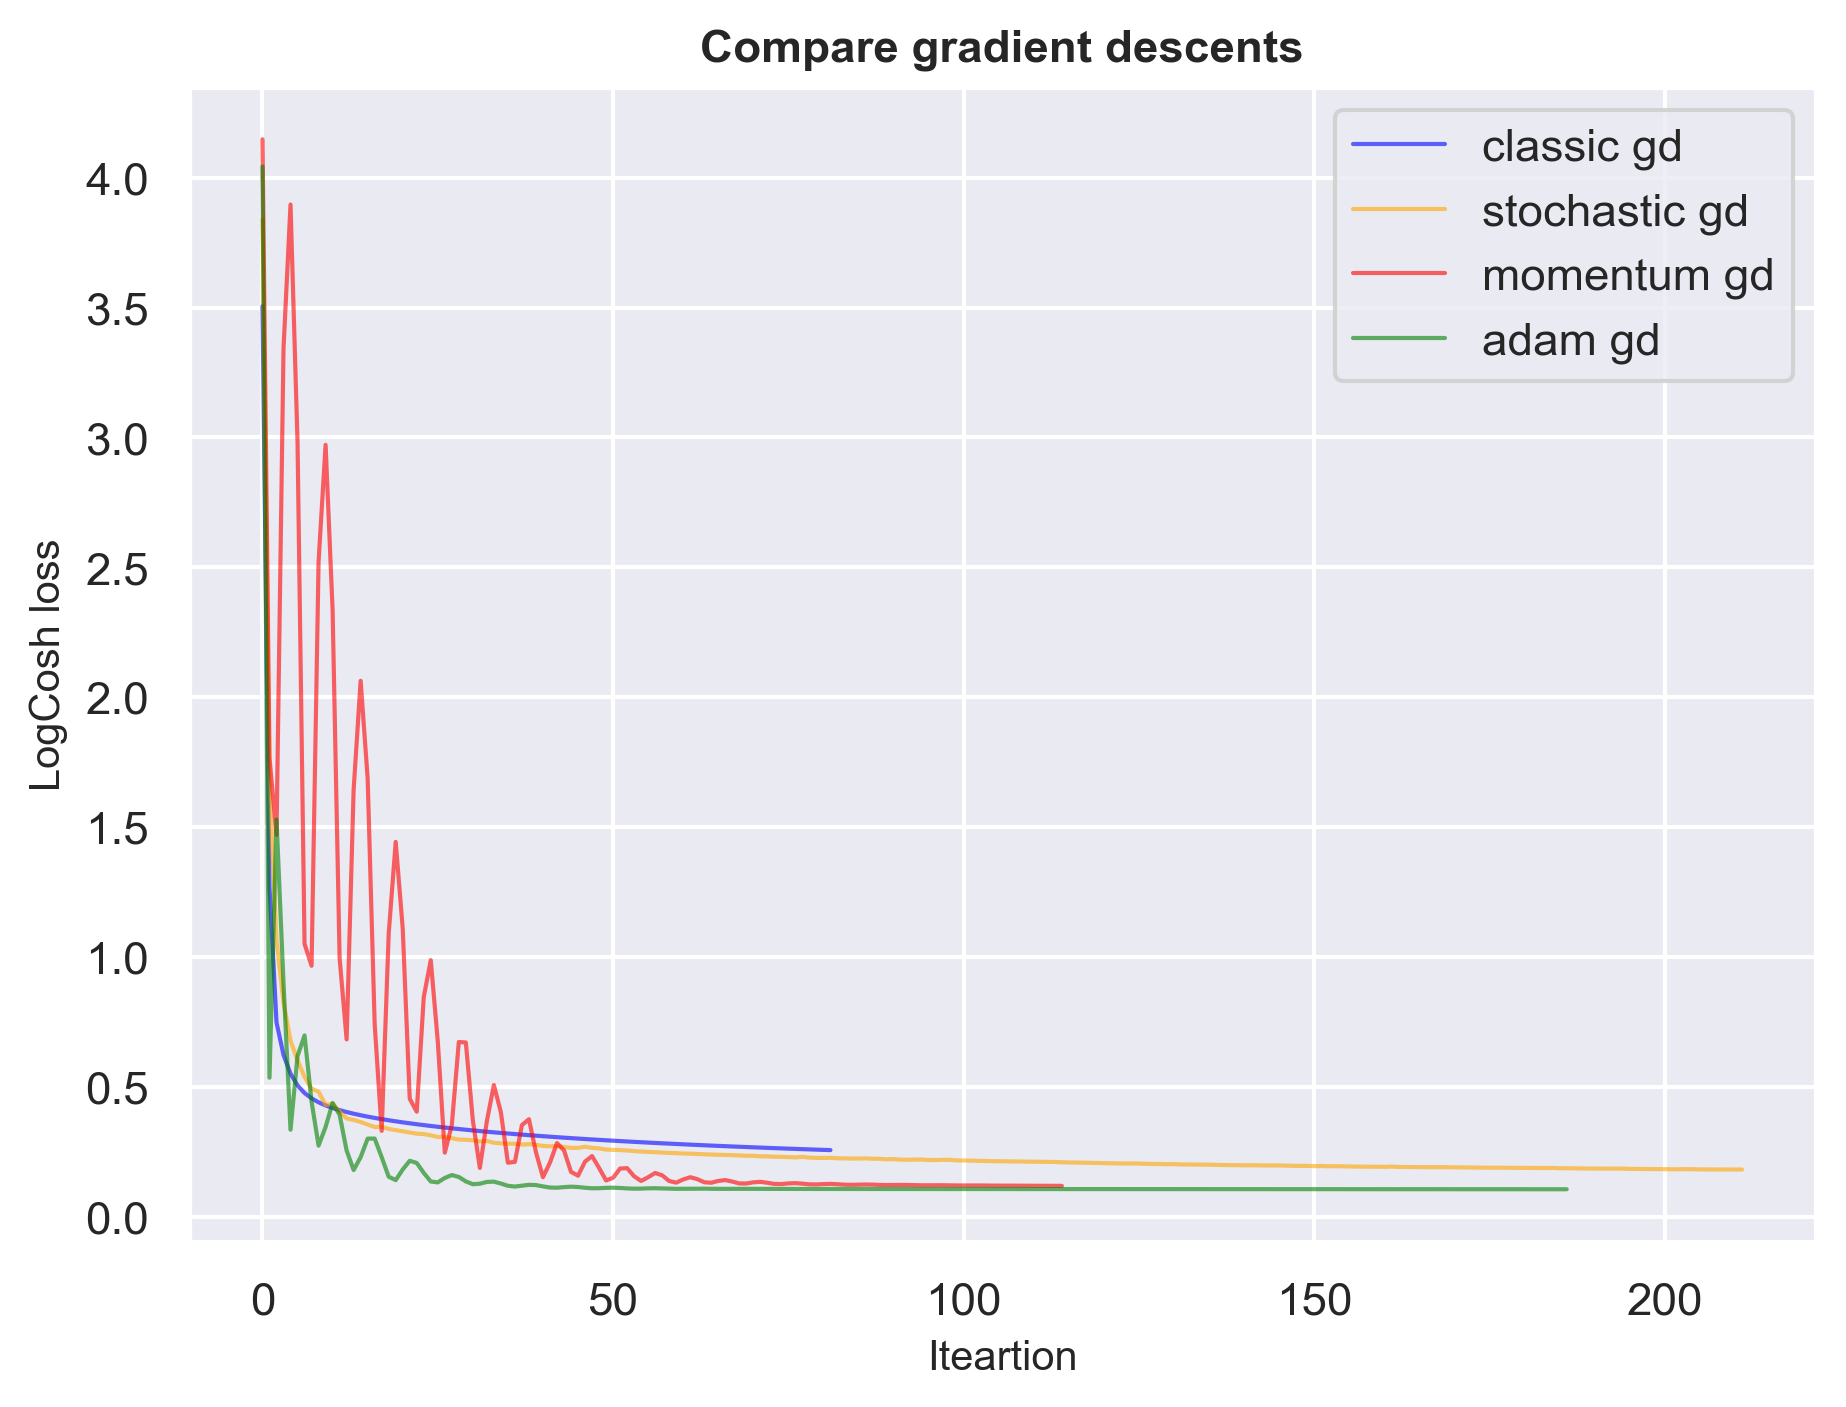

In [32]:
fig, ax = plt.subplots(figsize=(7, 5), dpi=300)

ax.plot(loss_history['full'], c='blue', lw=1, alpha=0.6, label='classic gd')
ax.plot(loss_history['stochastic'], c='orange', lw=1, alpha=0.6, label='stochastic gd')
ax.plot(loss_history['momentum'], c='red', lw=1, alpha=0.6, label='momentum gd')
ax.plot(loss_history['adam'], c='green', lw=1, alpha=0.6, label='adam gd')

ax.legend()

ax.set_title('Compare gradient descents', size=11, weight='extra bold')

ax.set_xlabel('Iteartion', size=10)
ax.set_ylabel('LogCosh loss', size=10)

plt.show()

**Траектории у моментума и адама теперь выглядят иначе - они прыгают вверх вниз, но по мере уменьшения лосса, затухают**

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

![](IMG_0460.png)

Яйцо древнерусское, да изделие пшеничное, ни один ящер окаянный не сможет принять трапезу сим явством. Накормил самого Перуна, сей пир он сниспослал мне во сне. Во имя Перуна, сниспошлите следующее задание на лучшем языке программирования Ве крест крест.

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: